In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

In [3]:
plt.style.use('seaborn-bright')

In [129]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Reduced_Socio_features_with_clusters.csv")

In [130]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

## Filling null values

In [131]:
cat_cols = ["BB_Categorical","PEO_TV_Categorical","IDD_INCOMING_Categorical","IDD_OUTGOING_Categorical",
            "ONNET_OUTGOING_Categorical","OFFNET_OUTGOING_Categorical","ONNET_INCOMING_Categorical",
            "Sub_Update_Status","Sub_Update",
            "OFFNET_INCOMING_Categorical","IDD_incoming_country","IDD_outgoing_country","IDD_Overall_Categorical",
            "Location_Identifier","GENDER","Voice_VAS_Month_Subscribed","BB_VAS_Month_Subscribed", "VOICE_Categorical",
            "Peo_VAS_Month_Subscribed","Other_VAS_Month_Subscribed","BB_Extra_GB_Purchase_Categorical",
            "Peo_TV_Package","Voice_VAS_Package","BB_VAS_Package","Other_VAS_Package",
            "Having_Insurance","Having_Senior_Citizen","Having_Kids_at_Home","Having_Teenagers_Students",
            "Having_Working_Professionals","Having_Family_Member_Abroad","Tamil_Customer"]

In [132]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [133]:
user_profile["KMOD_3_Cluster"].value_counts()

1    1367
2     875
0     758
Name: KMOD_3_Cluster, dtype: int64

<AxesSubplot:ylabel='KMOD_3_Cluster'>

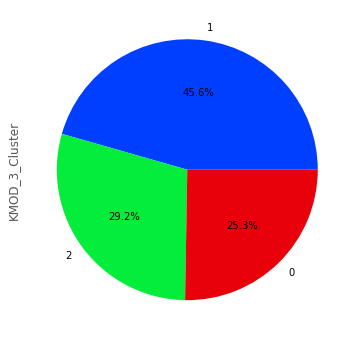

In [134]:
user_profile["KMOD_3_Cluster"].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

# Cluster analysis - Cluster 1

In [135]:
cluster_1 = user_profile[(user_profile["KMOD_3_Cluster"]==1)]

In [136]:
cluster_1.describe()

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
count            1367.000000            1315.000000             1290.000000   
mean                0.116064               0.119333                0.135147   
std                 0.116648               0.118355                0.130021   
min                 0.001202               0.001202                0.001202   
25%                 0.023413               0.025069                0.044073   
50%                 0.078297               0.085852                0.100765   
75%                 0.177529               0.184924                0.179093   
max                 1.000000               1.000000                1.000000   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count             1335.000000           706.000000           232.000000   
mean                 0.122224             0.095840             0.087457   
std                  0.106137             0.169845             0.128005   
min                  0.001202             0.002500             0.004808   
25%                  0.039455             0.006667             0.012821   
50%                  0.099572             0.020083             0.040064   
75%                  0.172656             0.093208             0.112981   
max                  0.933894             0.882000             0.806090   

       IDD_outgoing_Cumulative_Revenue  PEO_TV_Scaled   BB_Scaled  \
count                     2.320000e+02     153.000000  389.000000   
mean                      6.489295e+05       0.150899    0.359183   
std                       1.713892e+06       0.272823    0.272919   
min                       3.500000e+02       0.000000    0.005208   
25%                       2.870800e+04       0.000000    0.118056   
50%                       1.502500e+05       0.000000    0.276042   
75%                       4.592455e+05       0.218750    0.565972   
max                       1.214834e+07       0.950000    1.000000   

        BIRTH_YEAR  ...  Peo_Packages_if_Kids  \
count  1002.000000  ...                1367.0   
mean   1962.863273  ...                   0.0   
std      14.429486  ...                   0.0   
min    1911.000000  ...                   0.0   
25%    1953.000000  ...                   0.0   
50%    1964.000000  ...                   0.0   
75%    1973.000000  ...                   0.0   
max    1999.000000  ...                   0.0   

       Peo_Packages_if_Teenager_Students  \
count                        1367.000000   
mean                            0.000293   
std                             0.007647   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             0.200000   

       Peo_Package_if_Working_Professionals  VAS_if_Kids  \
count                           1367.000000  1367.000000   
mean                               0.000585     0.018654   
std                                0.010807     0.115663   
min                                0.000000     0.000000   
25%                                0.000000     0.000000   
50%                                0.000000     0.000000   
75%                                0.000000     0.000000   
max                                0.200000     1.000000   

       VAS_if_Teenager_Students  VAS_if_Working_Professionals  \
count               1367.000000                   1367.000000   
mean                   0.040380                      0.034711   
std                    0.121578                      0.100622   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.000000                      0.000000   
max                    0.800000                      0.750000   

       IDD_if_Family_Member_Abr

#### Exceptional (Outlier Usage)

<AxesSubplot:>

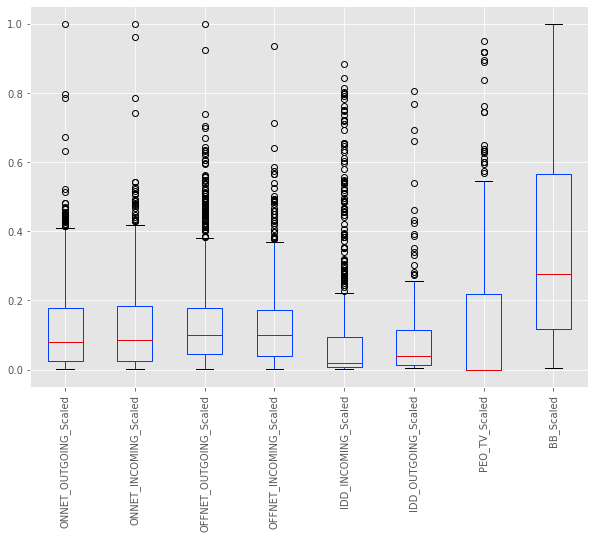

In [12]:
cluster_1.iloc[:,[4,7,10,13,16,20,26,28,62]].boxplot(figsize=(10,7),rot=90)

### Exceptional Users (Outliers) analysis

In [13]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

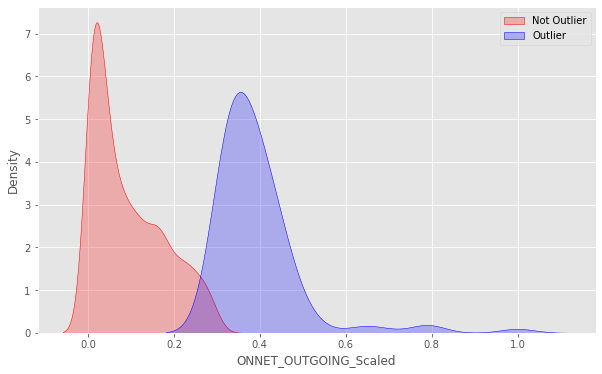

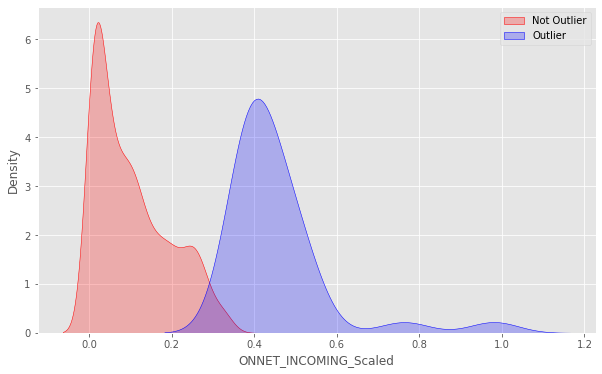

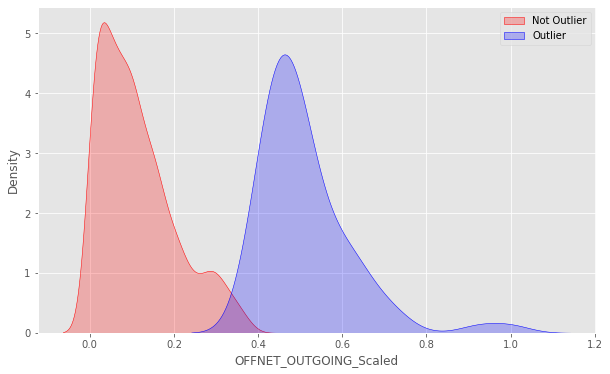

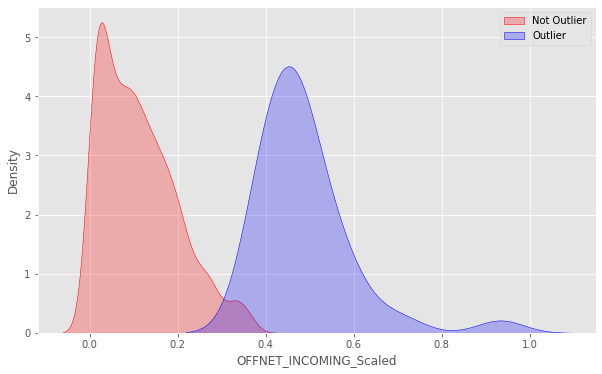

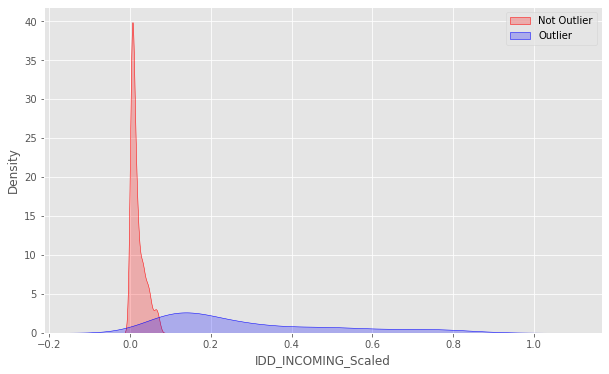

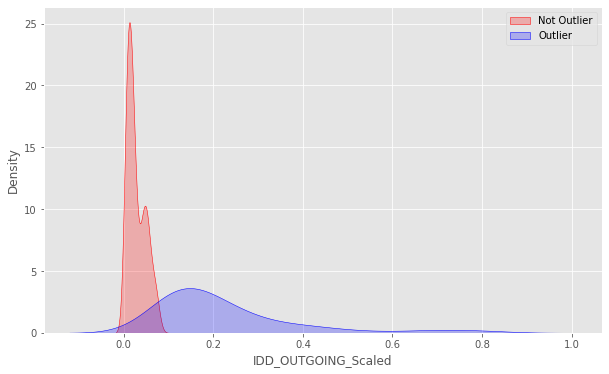

In [14]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_1[scaled_cols[i]][(cluster_1[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_1[scaled_cols[i]][(cluster_1[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [15]:
# Voice Outliers
cluster_1_out = cluster_1[(cluster_1["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_1["ONNET_INCOMING_Outlier"]=="YES") | (cluster_1["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_1["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_1["IDD_OUTGOING_Outlier"]=="YES") | (cluster_1["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

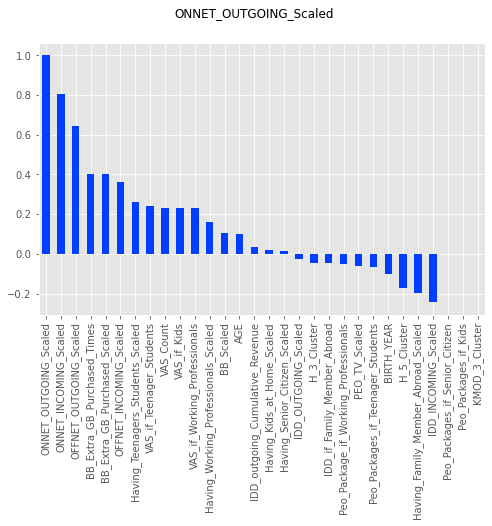

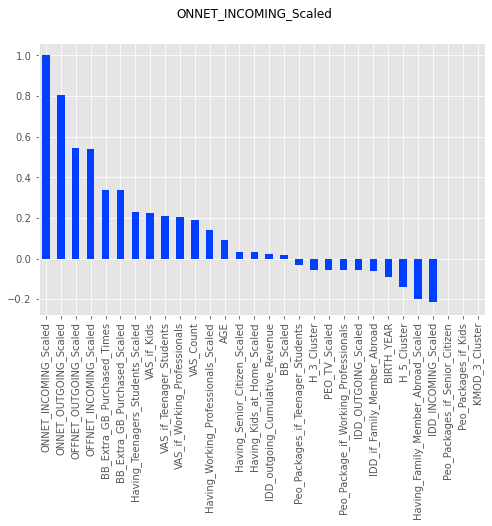

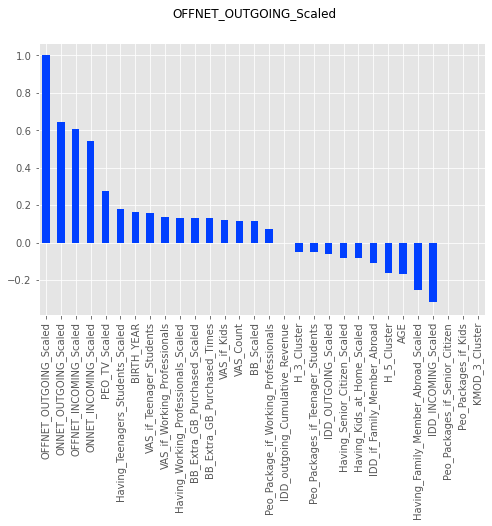

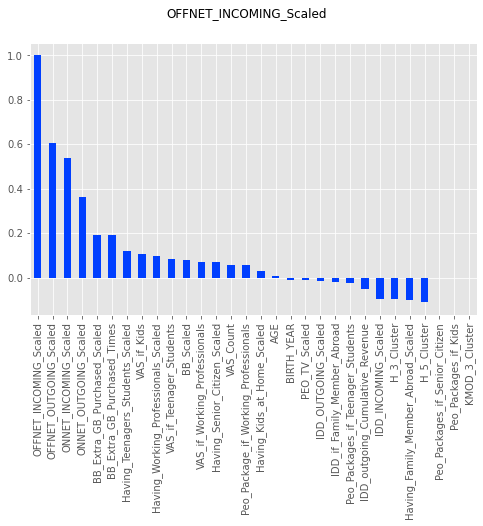

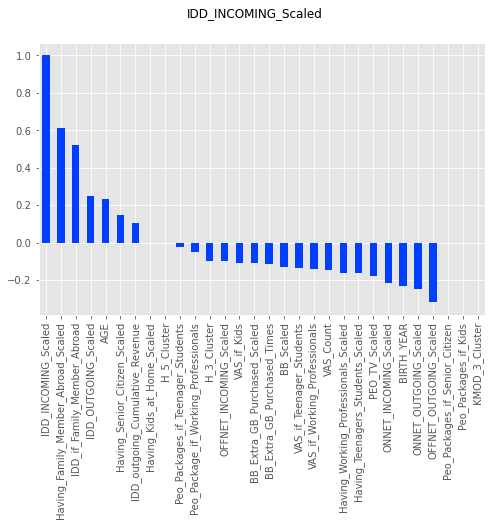

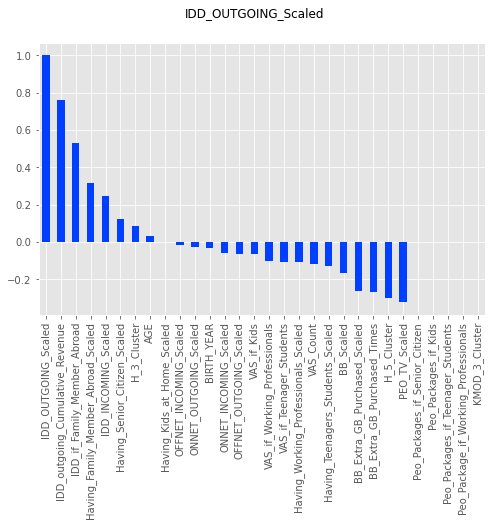

In [16]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_1_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [17]:
cluster_1_out_sub_df = pd.DataFrame([dict(cluster_1["Sub_Type"].value_counts()),dict(cluster_1_out["Sub_Type"].value_counts())])

In [18]:
cluster_1_out_sub_df

TRIPLE_PLAY  DOUBLE_PLAY_BV  SINGLE_PLAY  DOUBLE_PLAY_PV   4G
0         1071             165          108              22  1.0
1          259              53           16               4  NaN

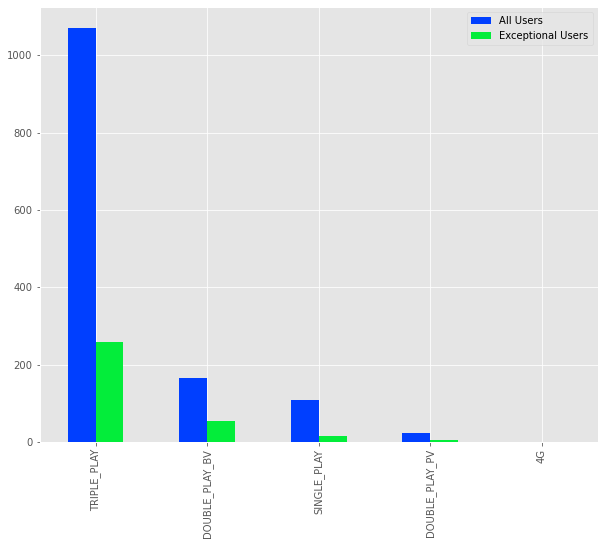

In [19]:
fig, ax = plt.subplots()
cluster_1_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

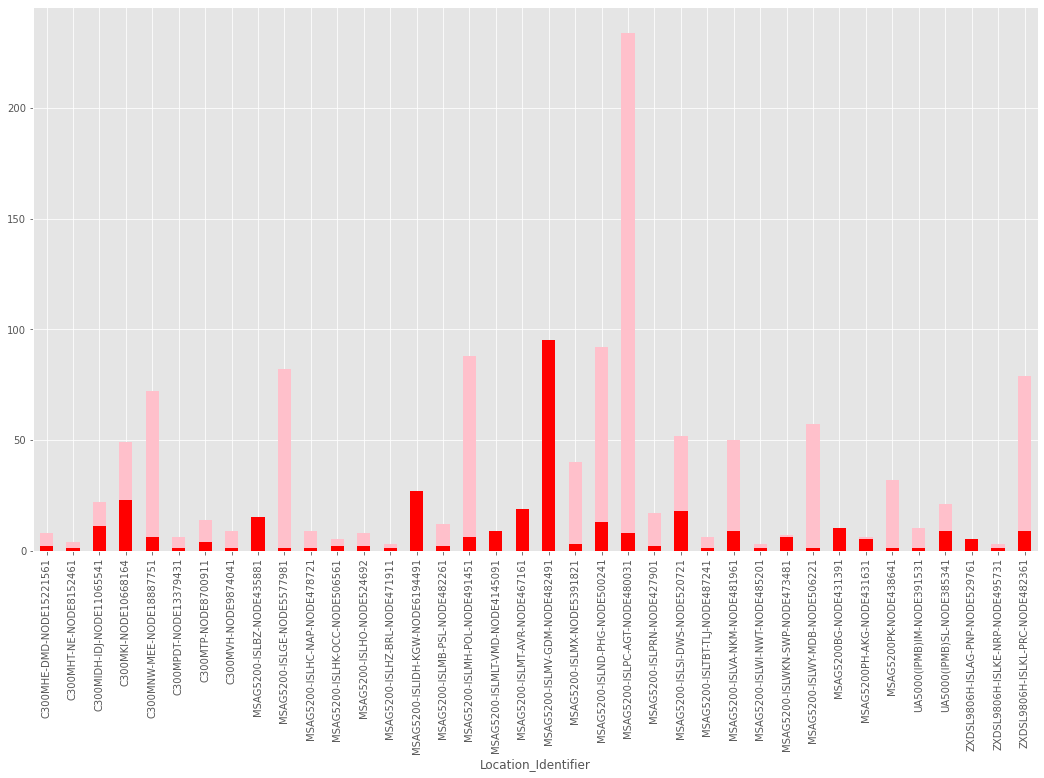

In [20]:
cluster_1_loc = cluster_1.groupby('Location_Identifier').count()["event_source.hash"]
cluster_1_out_loc = cluster_1_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_1_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

#### Skewness and Distribution

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

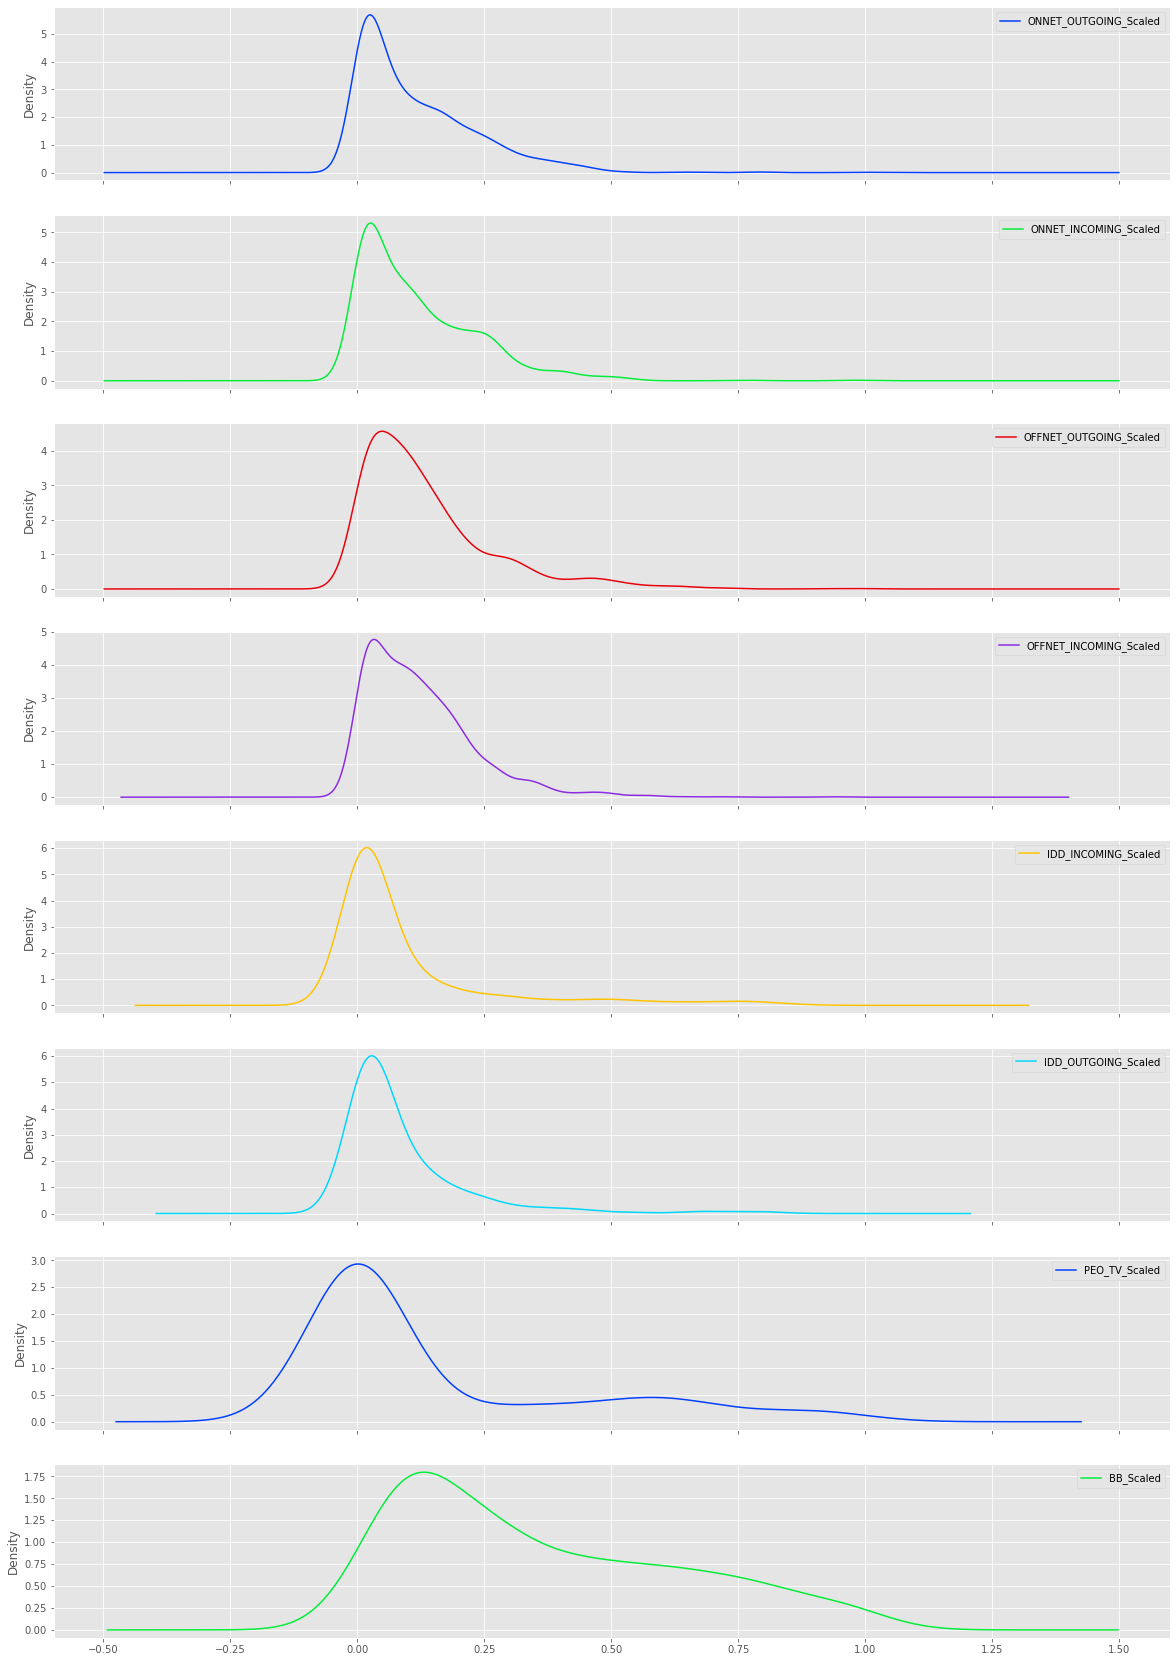

In [21]:
cluster_1.iloc[:,[4,7,10,13,16,20,26,28,62]].plot.kde(figsize=(20,30),subplots=True)

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>],
       [<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'VAS_Count'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Times'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Senior_Citizen_Scaled'}>],
       [<AxesSubplot:title={'center':'Having_Kids_at_Home_Scaled'}>,
 

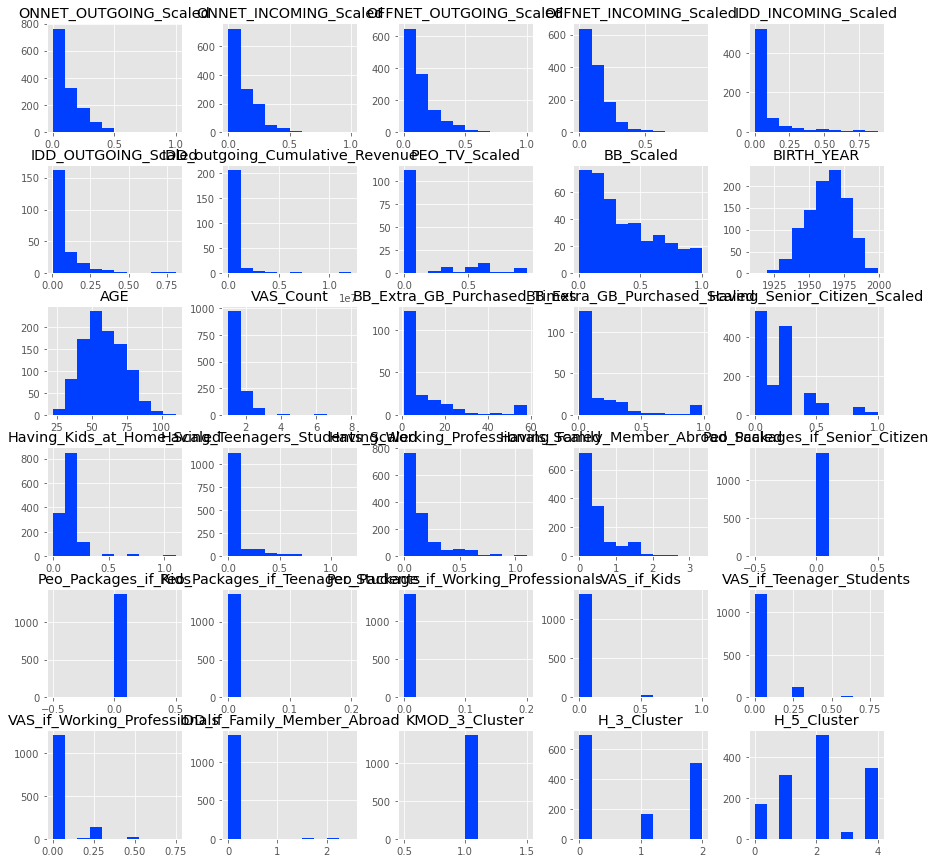

In [22]:
cluster_1.hist(figsize=(15,15))

### Subscription Type and Usage

In [23]:
cluster_1["Sub_Type"].value_counts()

TRIPLE_PLAY       1071
DOUBLE_PLAY_BV     165
SINGLE_PLAY        108
DOUBLE_PLAY_PV      22
4G                   1
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

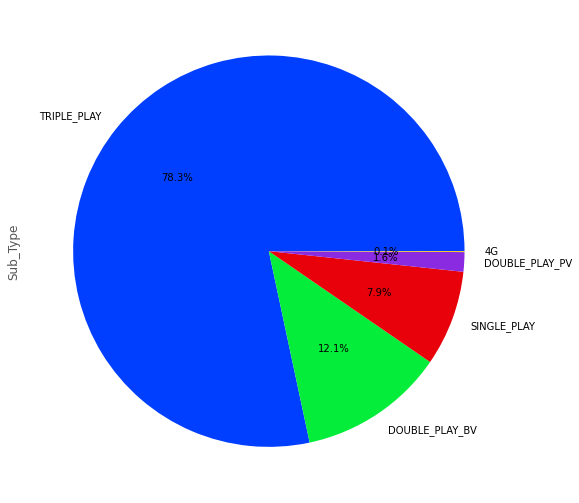

In [24]:
cluster_1["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [25]:
len(cluster_1[(cluster_1["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

1340

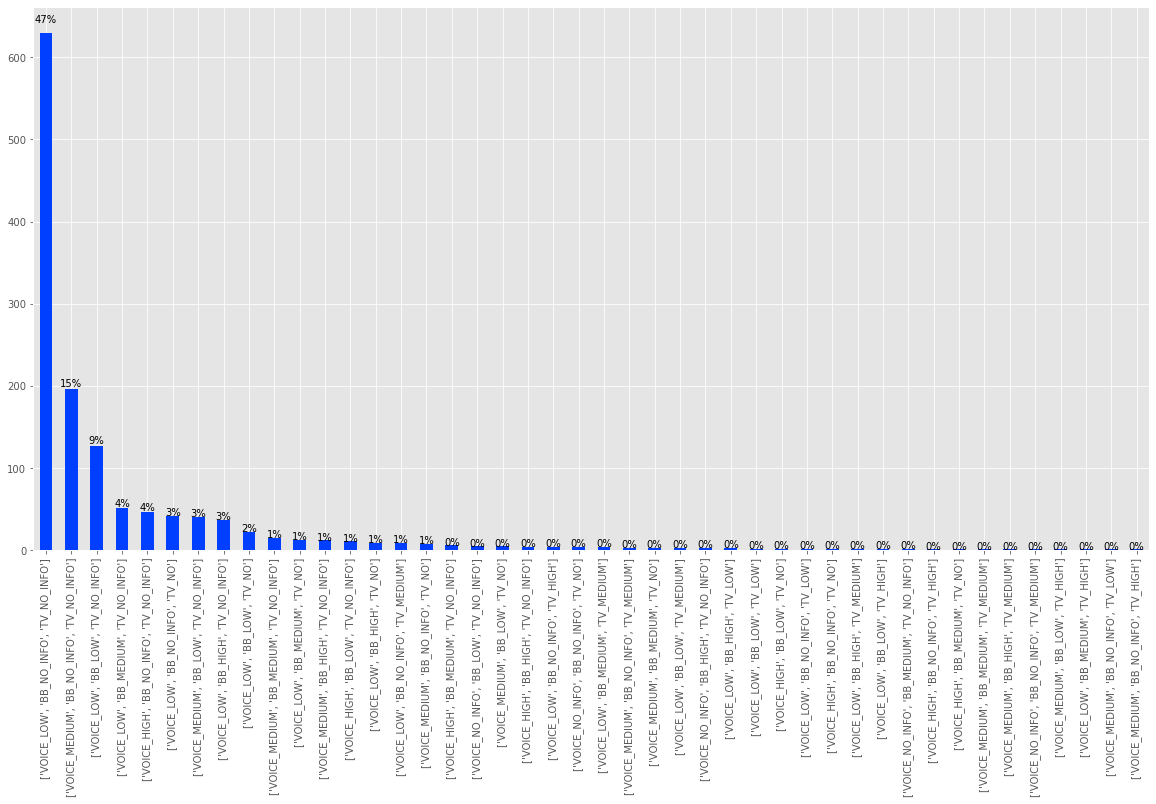

In [26]:
ax =cluster_1[(cluster_1["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Subscription state

####  Subscription: Assumed vs. Actual

<AxesSubplot:ylabel='Sub_Type_State'>

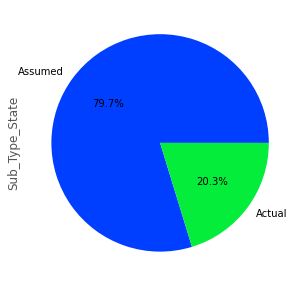

In [137]:
cluster_1["Sub_Type_State"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%')

<AxesSubplot:ylabel='Sub_Update_Status'>

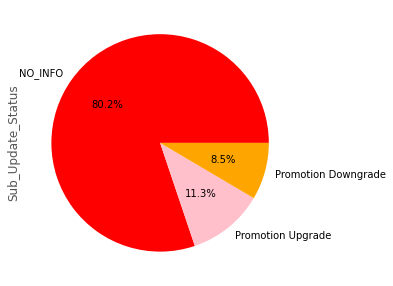

In [138]:
cluster_1["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

<AxesSubplot:ylabel='Sub_Update_Status'>

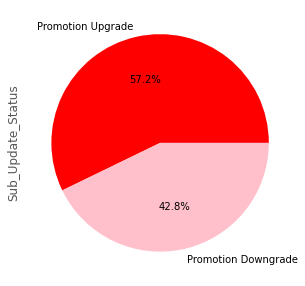

In [144]:
cluster_1[(cluster_1["Sub_Update_Status"]!= "NO_INFO")]["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

<AxesSubplot:ylabel='Sub_Update'>

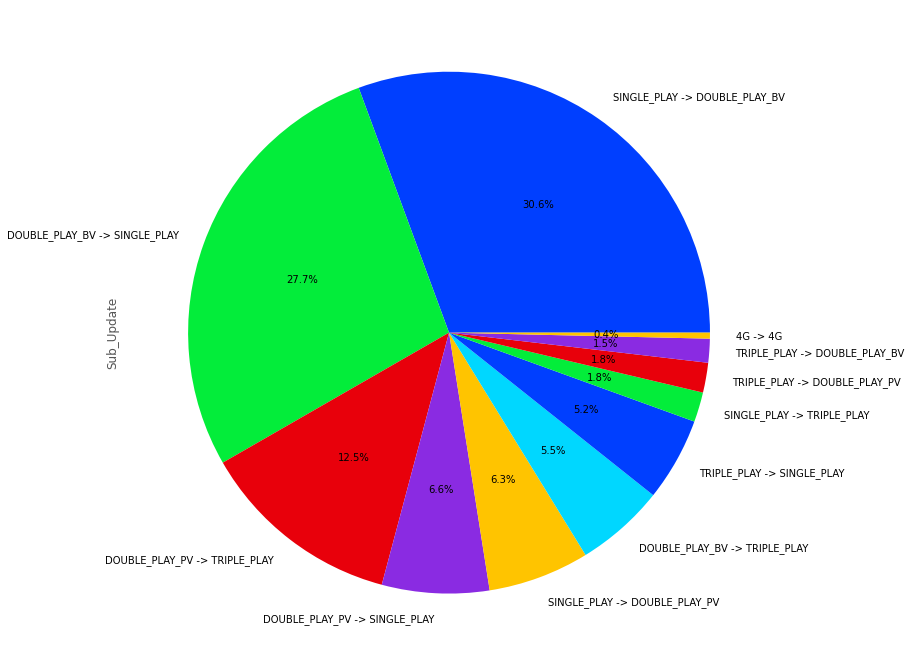

In [145]:
cluster_1[(cluster_1["Sub_Update"] !="NO_INFO")]["Sub_Update"].value_counts().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%')

### Voice Calls Usage

In [27]:
cluster_1["VOICE_Categorical"].value_counts()

LOW        964
MEDIUM     287
HIGH        74
NO_INFO     42
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

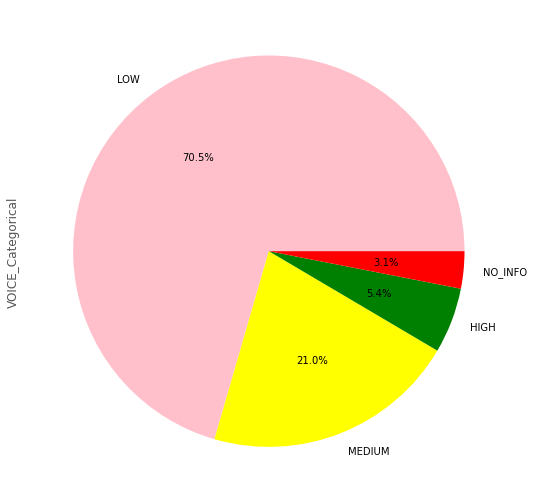

In [28]:
cluster_1["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','green','red'] )

### VOICE VAS Packages

In [31]:
count_dict = dict(cluster_1["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

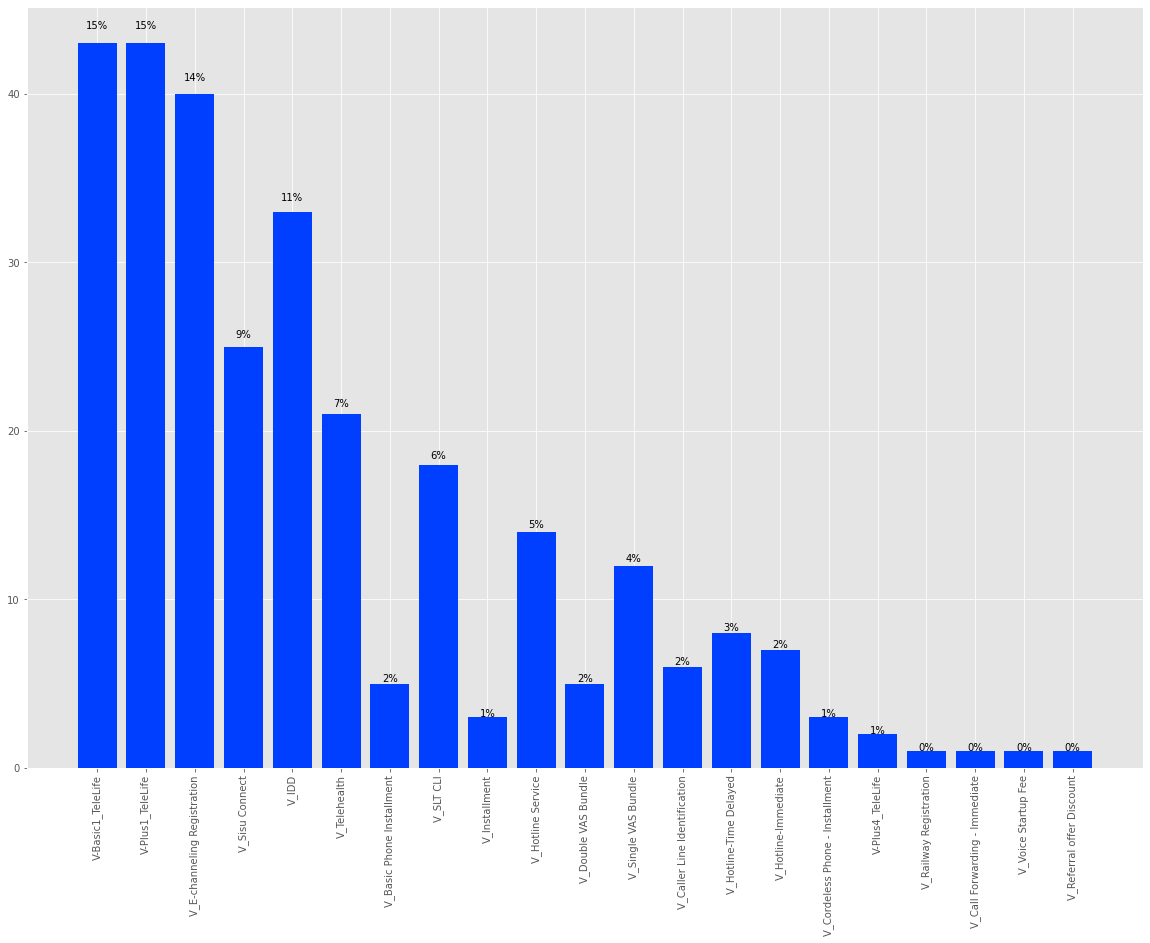

In [32]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [33]:
cluster_1["IDD_Overall_Categorical"].value_counts()

LOW        713
NO_INFO    633
MEDIUM      15
HIGH         6
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

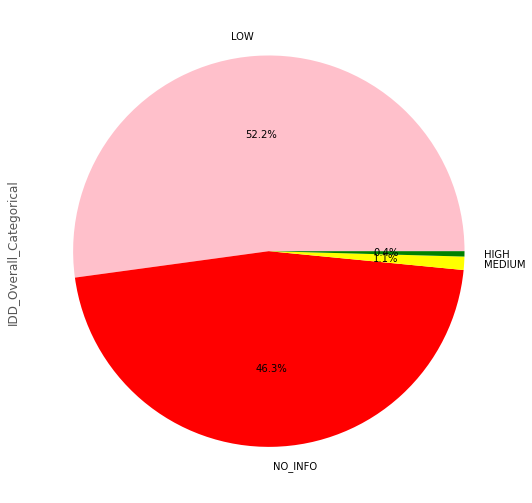

In [35]:
cluster_1["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink','red','yellow','green'] )

#### IDD Calling country analysis

In [36]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [37]:
cluster_1_idd_country_df = cluster_1[["event_source.hash","IDD_incoming_country"]]

In [38]:
cluster_1_idd_country_df["IDD_incoming_country"] = cluster_1_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-38-fb17b23ded5f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
cluster_1_idd_country_df = cluster_1_idd_country_df.explode("IDD_incoming_country")

<AxesSubplot:>

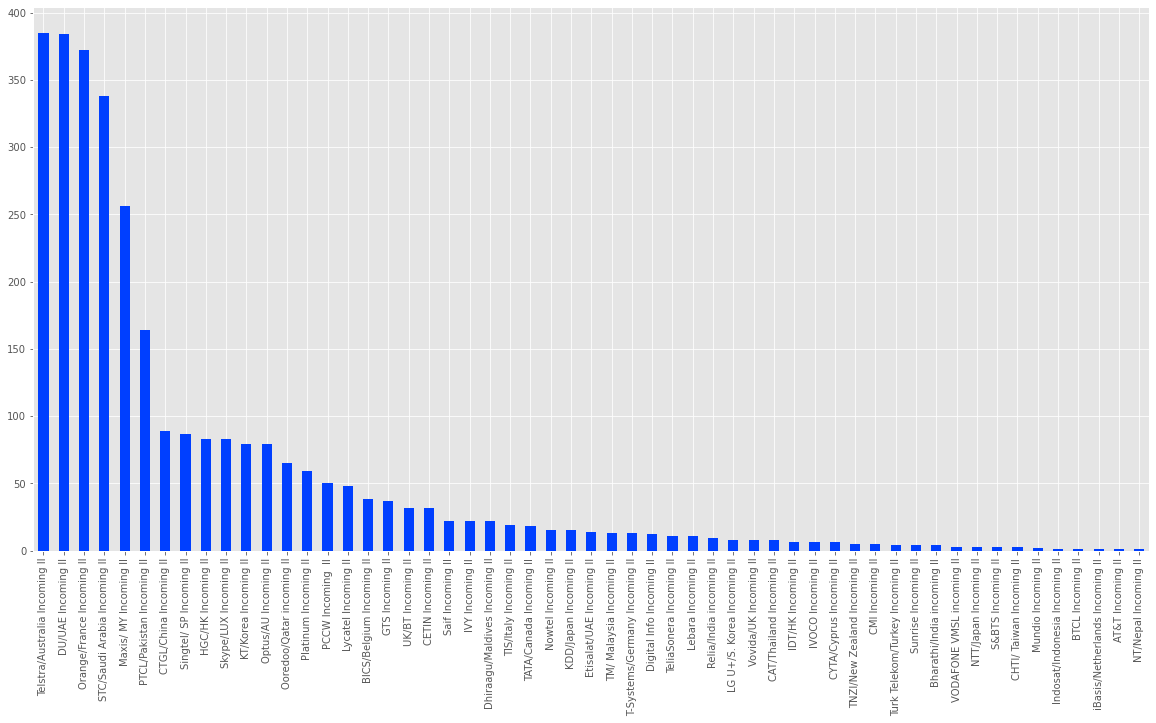

In [40]:
cluster_1_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Outgoing Countries

In [41]:
cluster_1_idd_out_country_df = cluster_1[["event_source.hash","IDD_outgoing_country"]]

In [42]:
cluster_1_idd_out_country_df["IDD_outgoing_country"] = cluster_1_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-42-cee6c1f97979>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
cluster_1_idd_out_country_df = cluster_1_idd_out_country_df.explode("IDD_outgoing_country")

In [44]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [45]:
cluster_1_idd_out_country_df["IDD_outgoing_country"] = cluster_1_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

<AxesSubplot:>

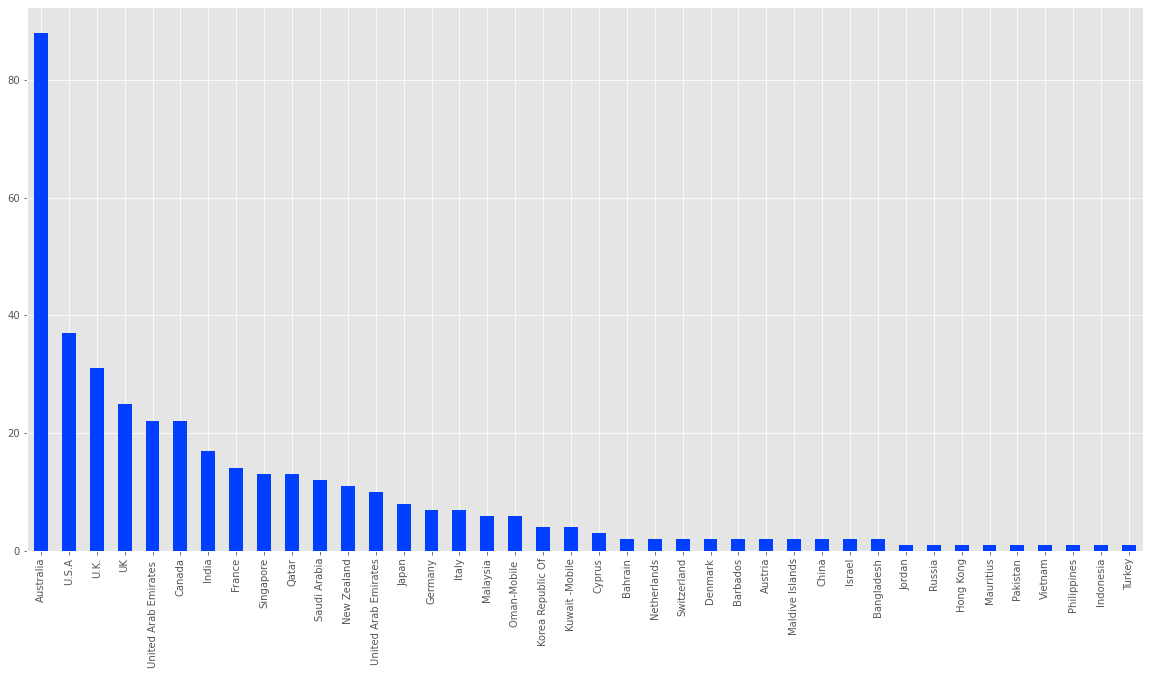

In [46]:
cluster_1_idd_out_country_df["IDD_outgoing_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Rental anlysis

In [47]:
cluster_1["IDD_outgoing_Cumulative_Revenue"].value_counts()

10200.0     2
5400.0      2
2450.0      2
46334.0     1
264483.0    1
           ..
25000.0     1
576766.0    1
276092.0    1
23928.0     1
96000.0     1
Name: IDD_outgoing_Cumulative_Revenue, Length: 229, dtype: int64

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [48]:
cluster_1["PEO_TV_Categorical"].value_counts()

NO_INFO    1214
NO          111
MEDIUM       24
HIGH         10
LOW           8
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 1

<AxesSubplot:ylabel='PEO_TV_Categorical'>

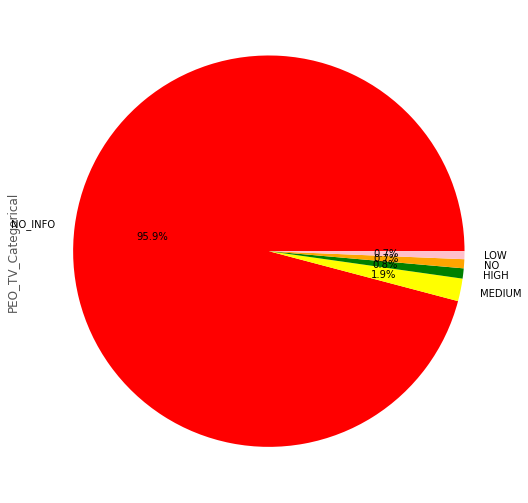

In [50]:
cluster_1_peo = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY")]
cluster_1_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','yellow','green','orange','pink'])

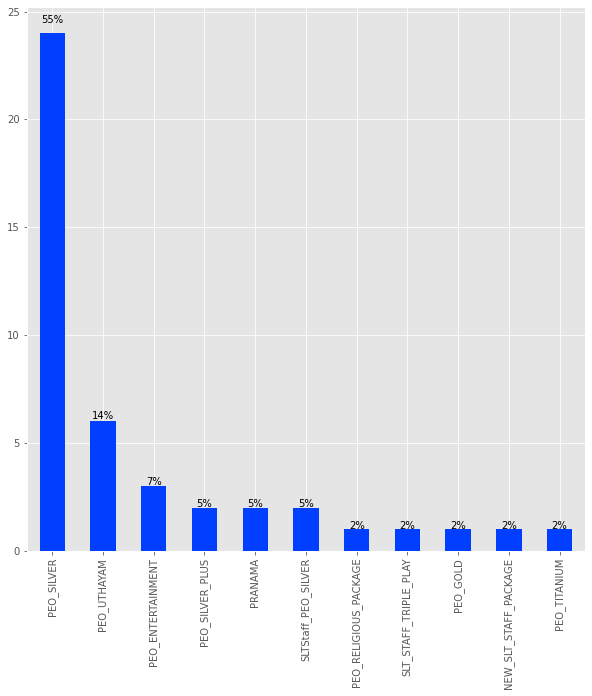

In [51]:
ax =cluster_1_peo[(cluster_1_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### PeoTV Usage among Double Play PV users in Cluster 1

<AxesSubplot:ylabel='PEO_TV_Categorical'>

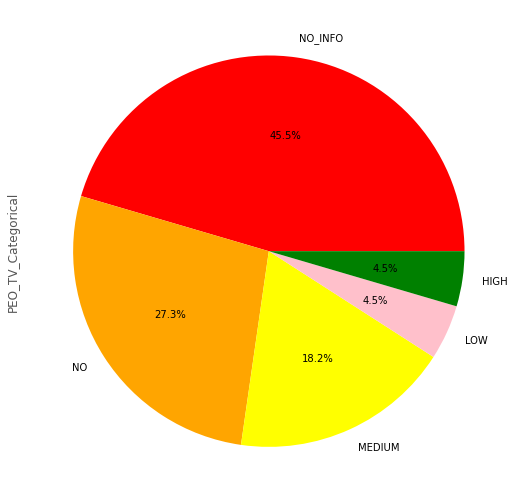

In [53]:
cluster_1_peo_pv = cluster_1[(cluster_1["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_1_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','orange','yellow','pink','green'])

In [54]:
cluster_1_peo_pv["PEO_TV_Categorical"].value_counts()

NO_INFO    10
NO          6
MEDIUM      4
LOW         1
HIGH        1
Name: PEO_TV_Categorical, dtype: int64

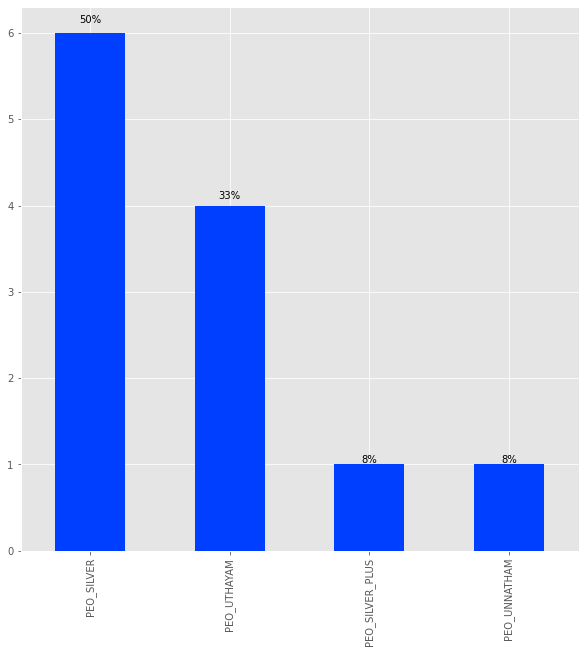

In [55]:
ax =cluster_1_peo_pv[(cluster_1_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [56]:
count_dict = dict(cluster_1["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

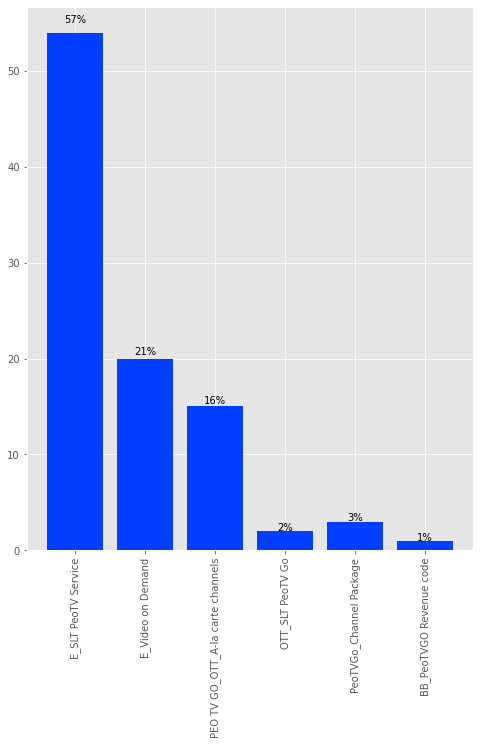

In [57]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [58]:
cluster_1["BB_Categorical"].value_counts()

NO_INFO    978
LOW        220
MEDIUM      98
HIGH        71
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 1

<AxesSubplot:ylabel='BB_Categorical'>

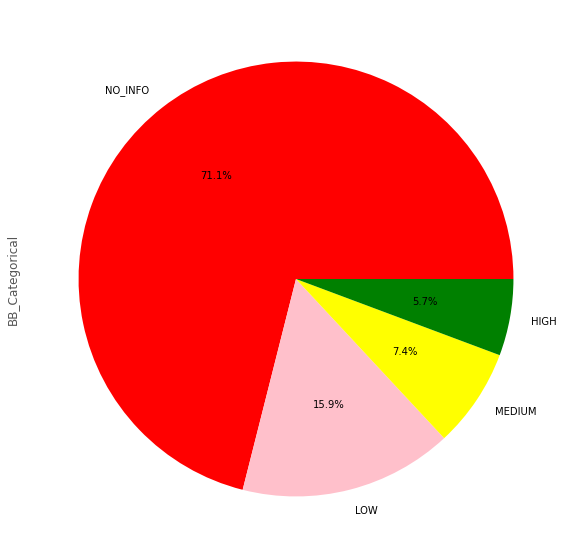

In [59]:
cluster_1_bb = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY")]
cluster_1_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

#### BB Usage for Double Play BV Customers in Cluster 1

<AxesSubplot:ylabel='BB_Categorical'>

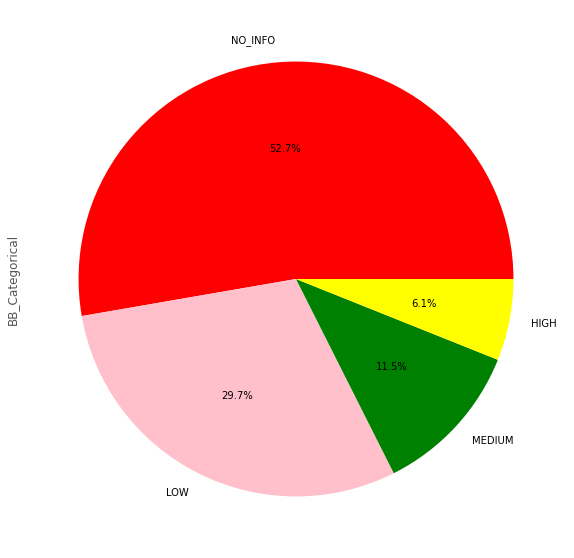

In [60]:
cluster_1_bb_dp = cluster_1[(cluster_1["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_1_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [61]:
count_dict = dict(cluster_1["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

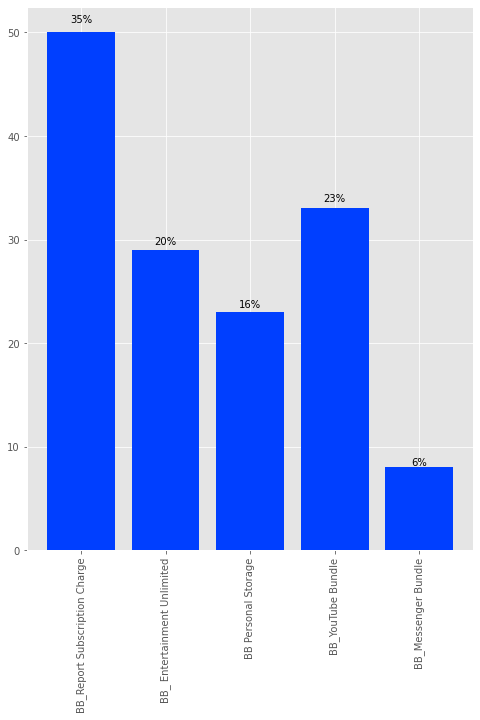

In [62]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [63]:
extra_gb_freq_users = cluster_1[(cluster_1["BB_Extra_GB_Purchased_Scaled"]>0.5)]

In [64]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

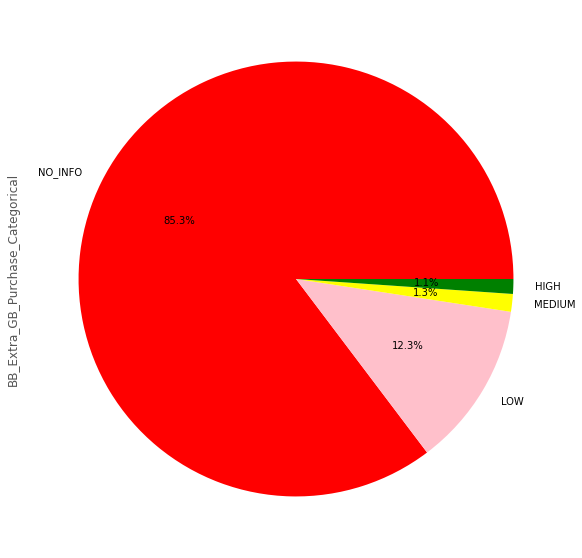

In [65]:
cluster_1["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

[Text(0, 0, 'e72fdc3f9d890d5551dd5081d53dcf8b'),
 Text(1, 0, '552d18e8515f81cf52f85d1cb995de16'),
 Text(2, 0, 'fe20b17a9573e4b7e765cc3098728f3d'),
 Text(3, 0, 'ebd27202064983929d81256450c31b9e'),
 Text(4, 0, '048f304256dc532c9aa79b434ab5ee2e'),
 Text(5, 0, '74ee3d188f159cc1493c791c27a7a135'),
 Text(6, 0, 'c5722f1197db46f96000e28ef6c36da1'),
 Text(7, 0, '87a25834b97075e230f0e7237b6205b7'),
 Text(8, 0, '91d83d11d3d356ad391441fa05bc3b90'),
 Text(9, 0, 'ffb63ff99cf1354dff1da862f379da80'),
 Text(10, 0, '0e7d786a4c50702484cf004a0d1b68a2'),
 Text(11, 0, '672440718a32b776e2f8f0a712f8390e'),
 Text(12, 0, 'e62d17dab22425b9abc747759fb38dbd'),
 Text(13, 0, '4cebd60d20845469364f6af9bf875cdd'),
 Text(14, 0, '31d67691d57f8199e202ad2b2958cd38'),
 Text(15, 0, '1b266fbf846f3eb53f6f0c1f2813bc0a'),
 Text(16, 0, '18d9469b1885b5988f72e8e7f62009ee'),
 Text(17, 0, '2f7f158f41981bbec8d526e50fea8464')]

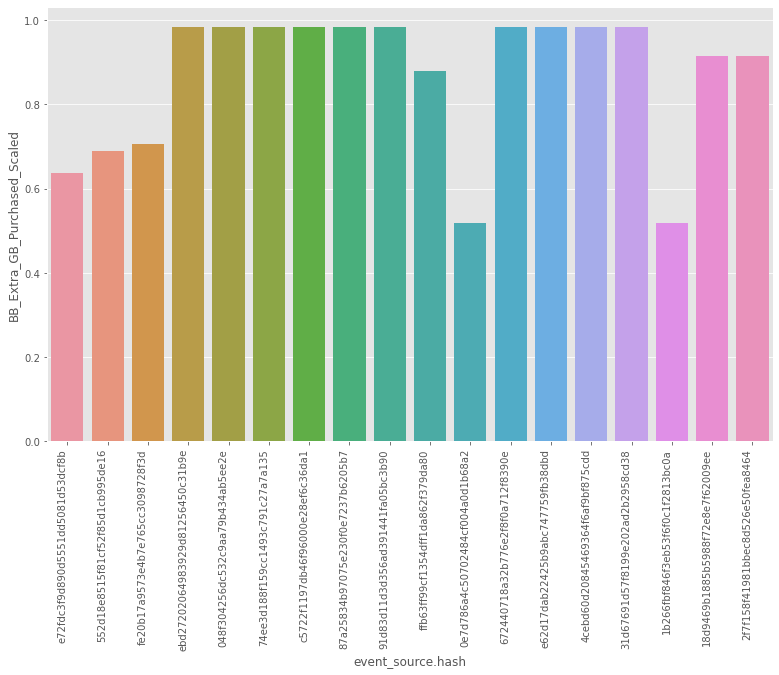

In [67]:
plt.figure(figsize=(13,8))
extra_gb_bar_plot = sns.barplot(data=extra_gb_freq_users,x='event_source.hash', y='BB_Extra_GB_Purchased_Scaled')

extra_gb_bar_plot.set_xticklabels(extra_gb_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Most Extra GB Useed users - By spent amount with Time

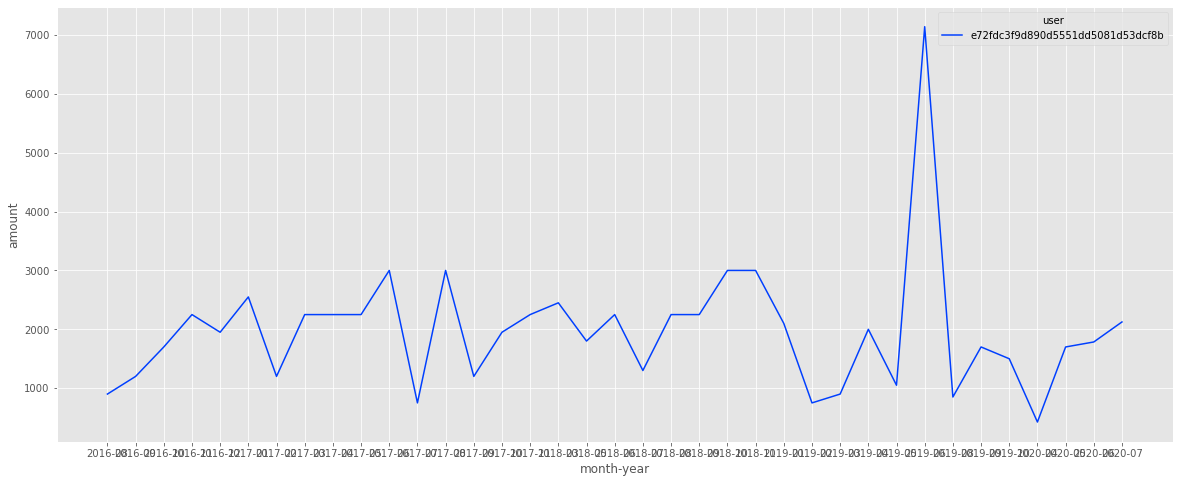

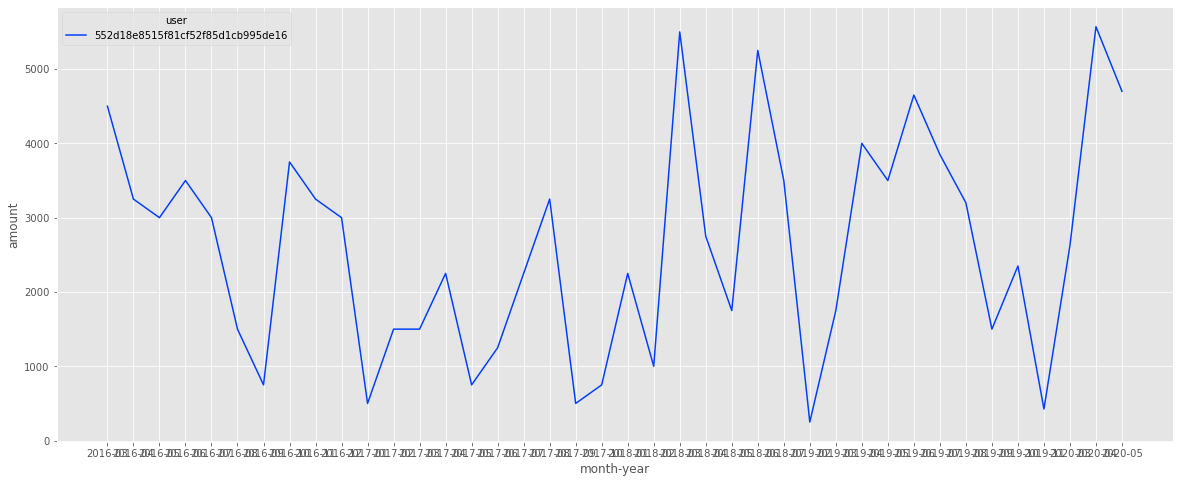

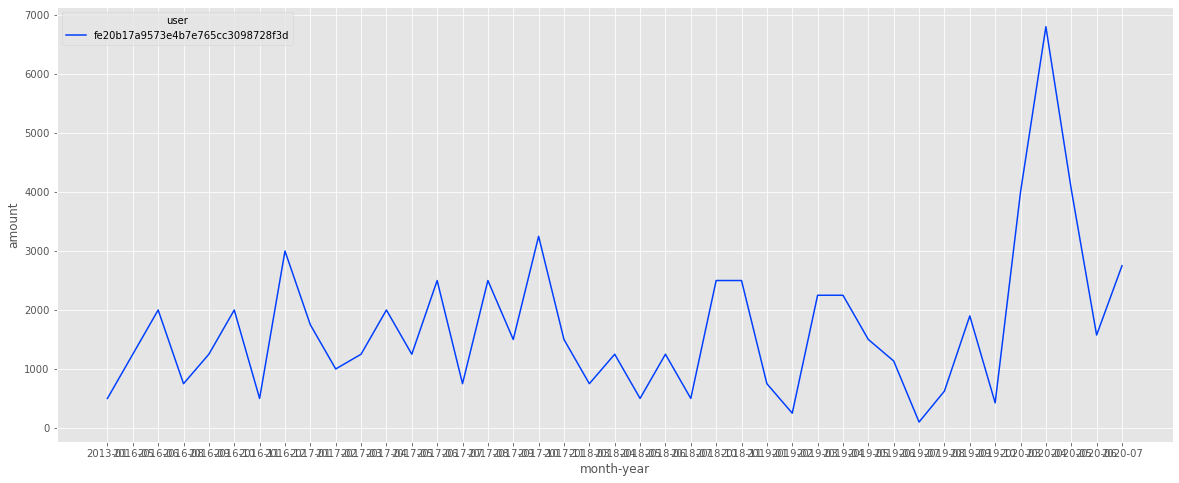

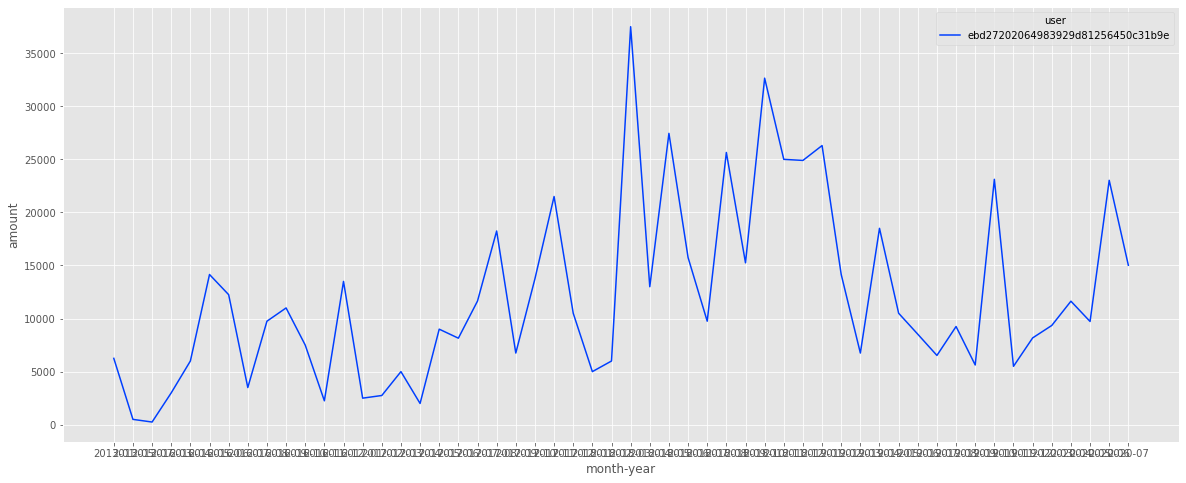

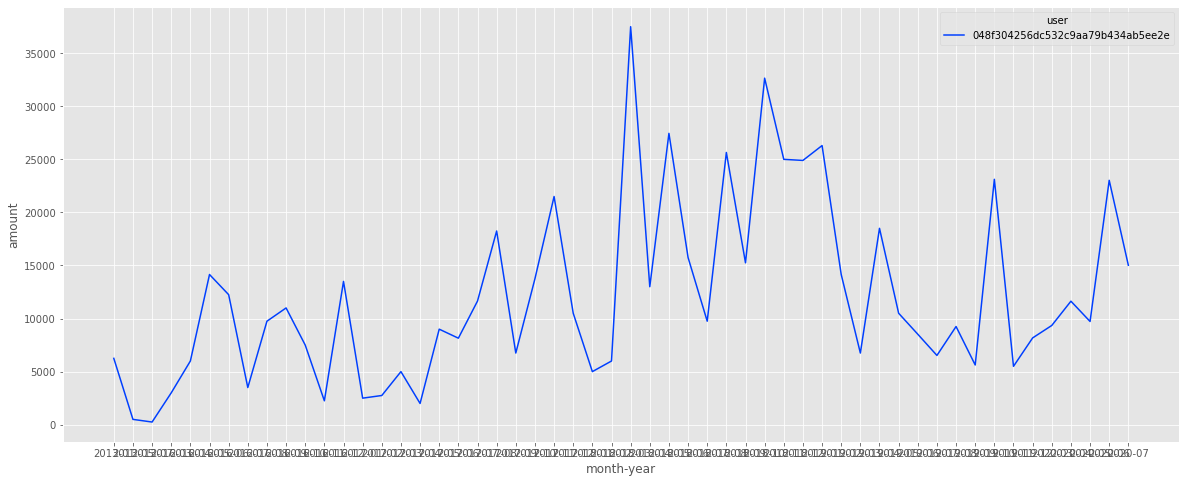

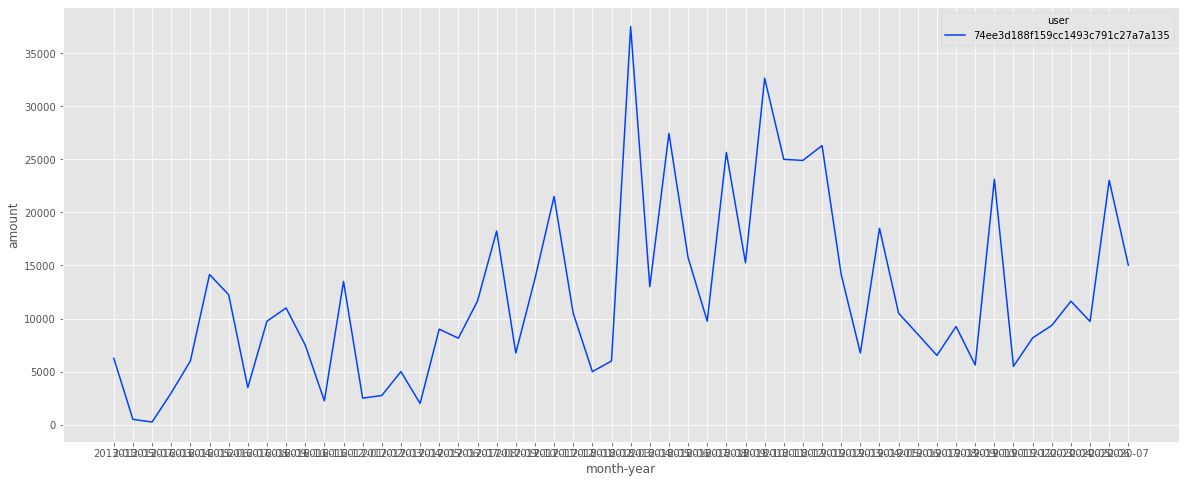

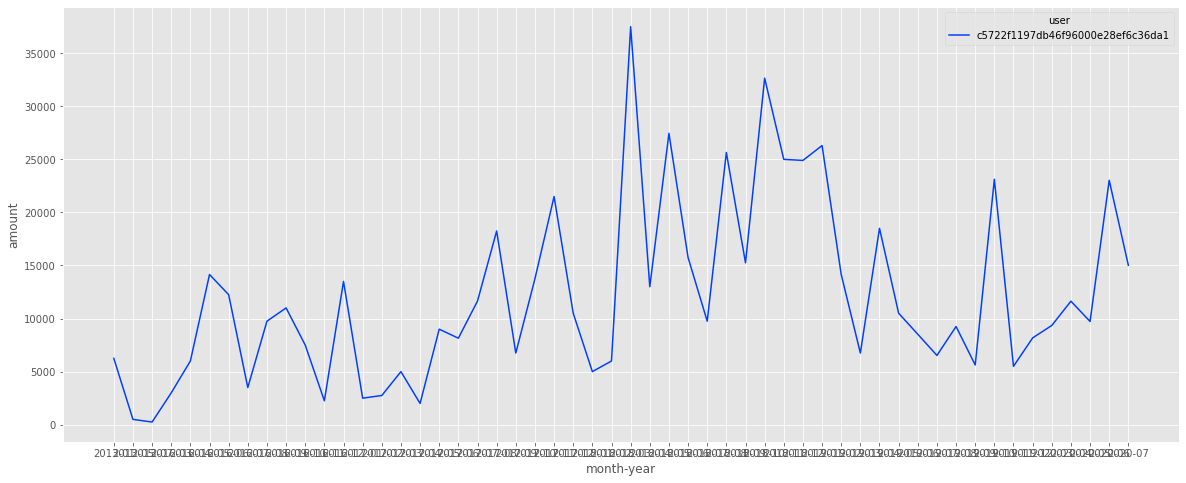

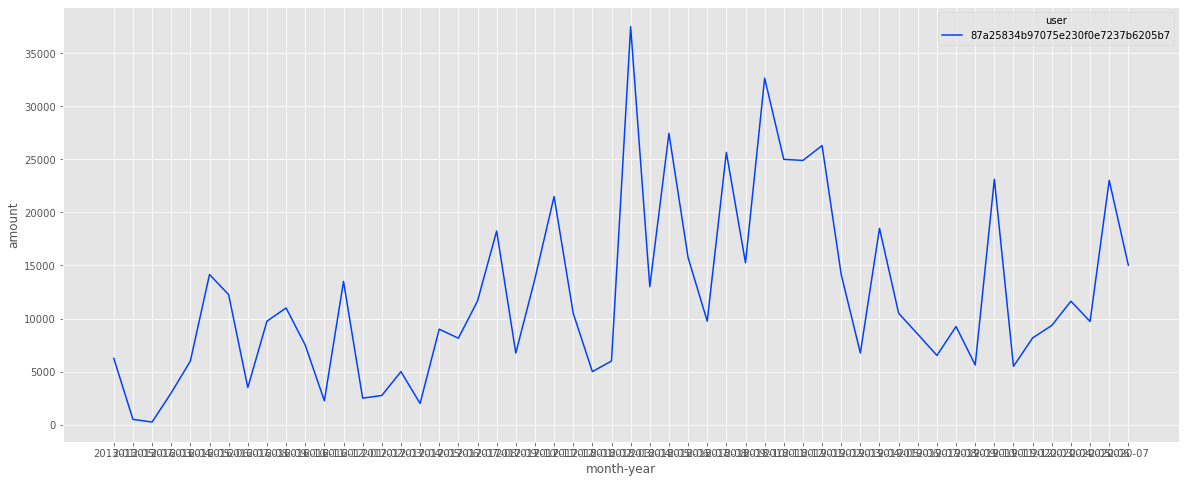

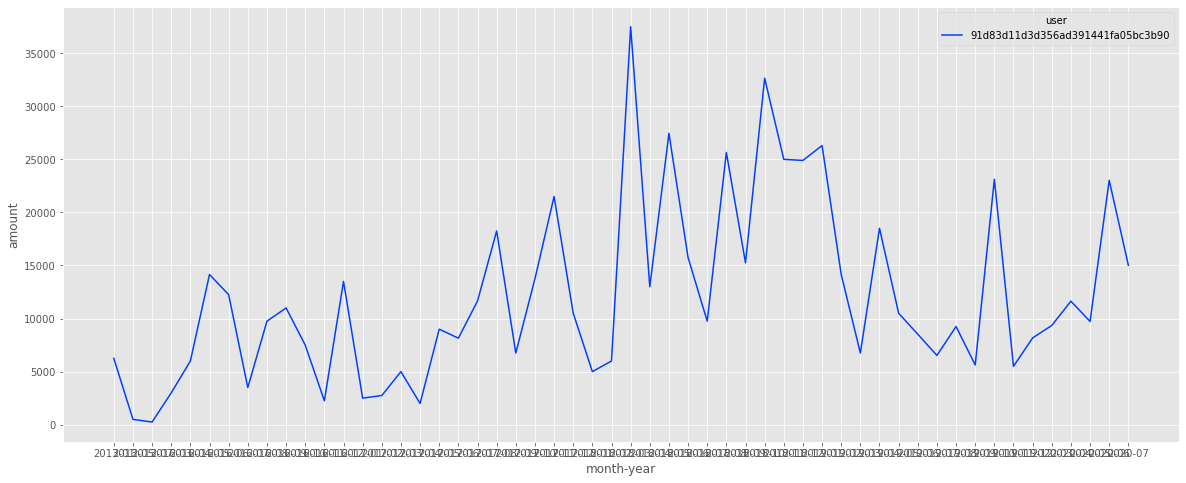

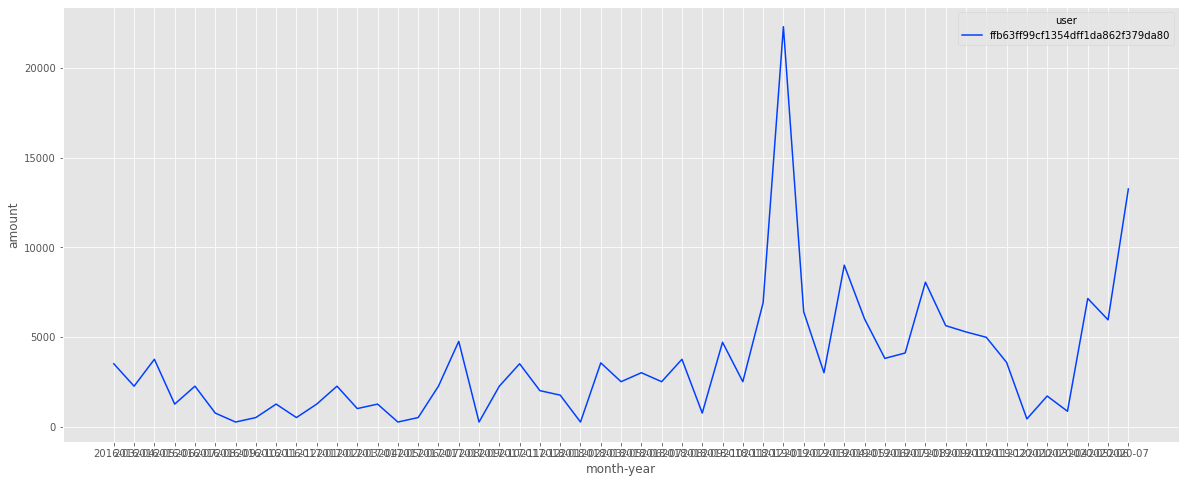

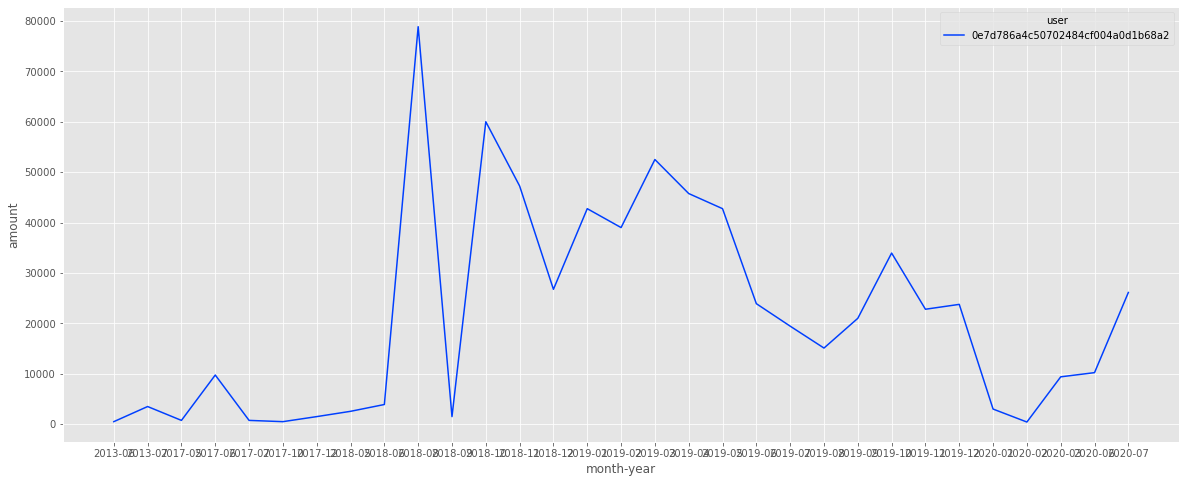

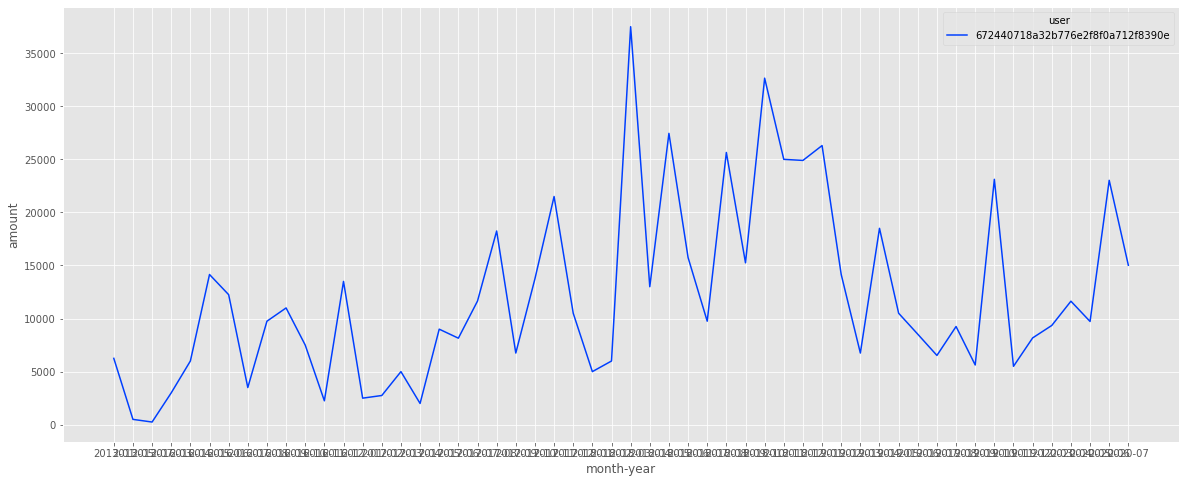

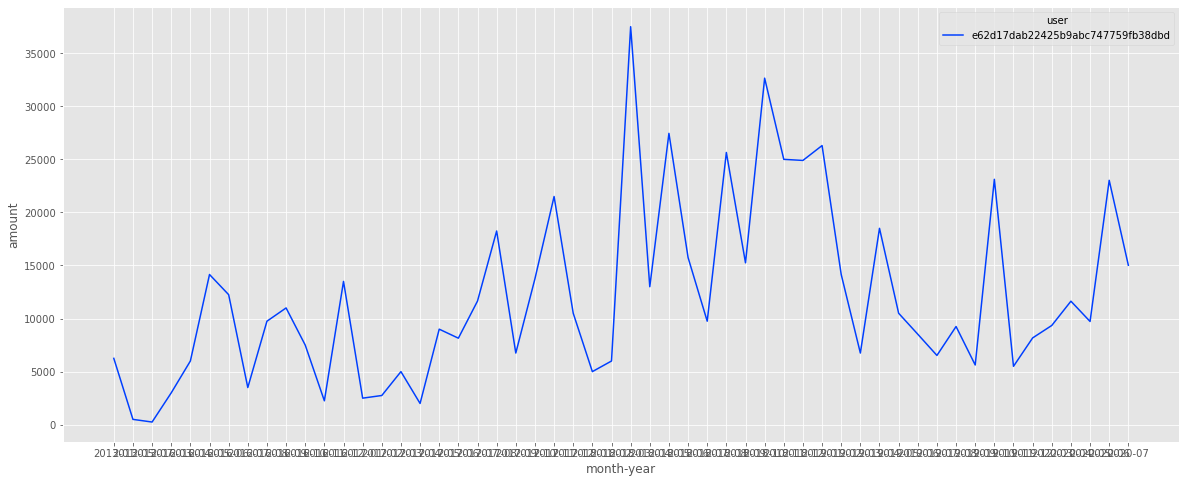

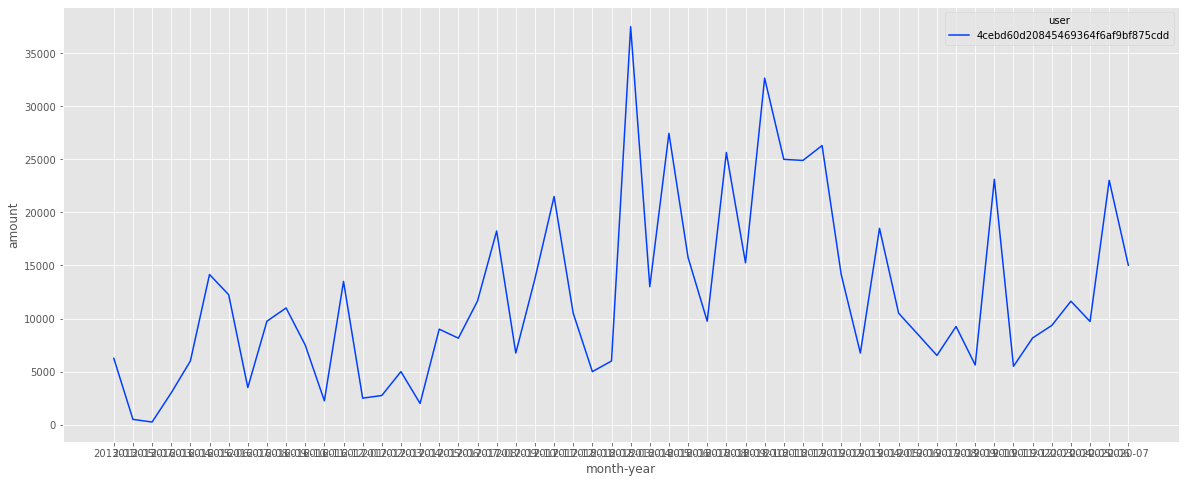

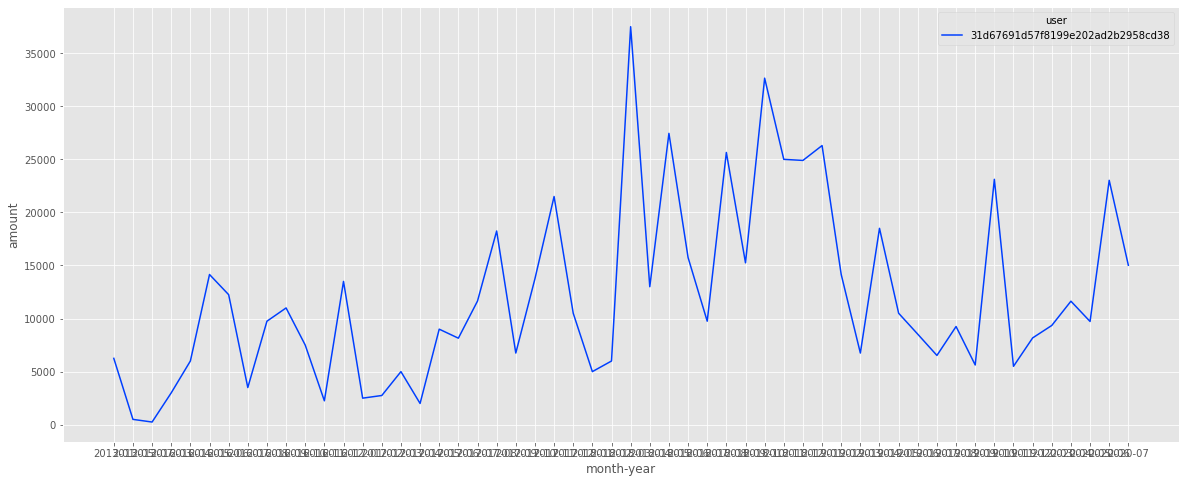

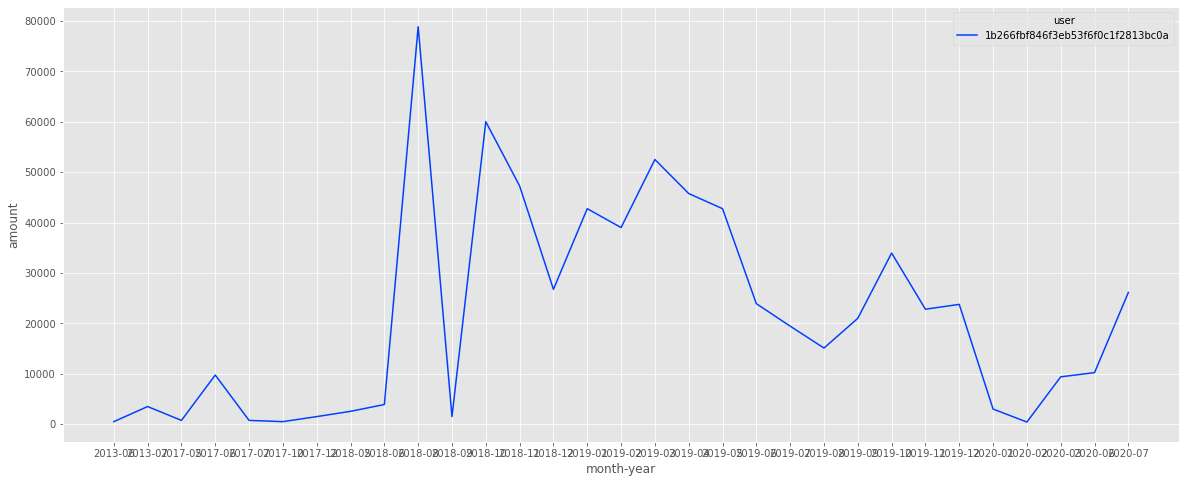

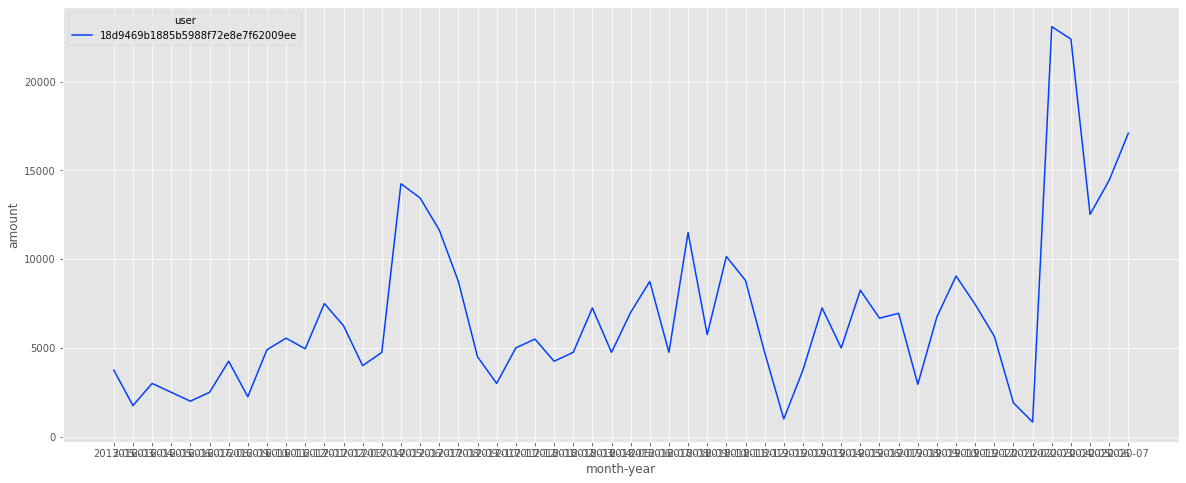

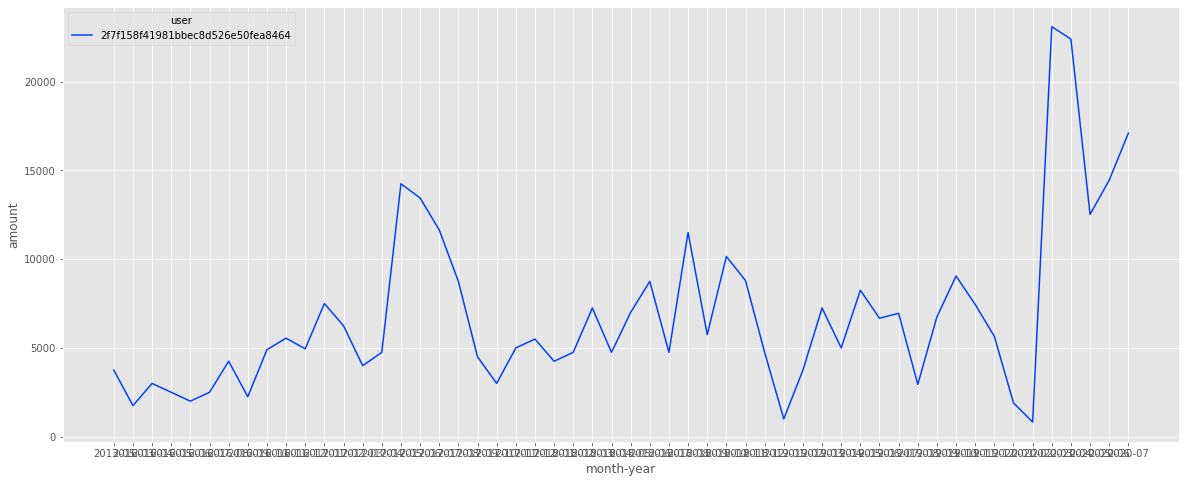

In [68]:

for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year', inplace=True)
        plt.figure(figsize=(20,8))
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')
        

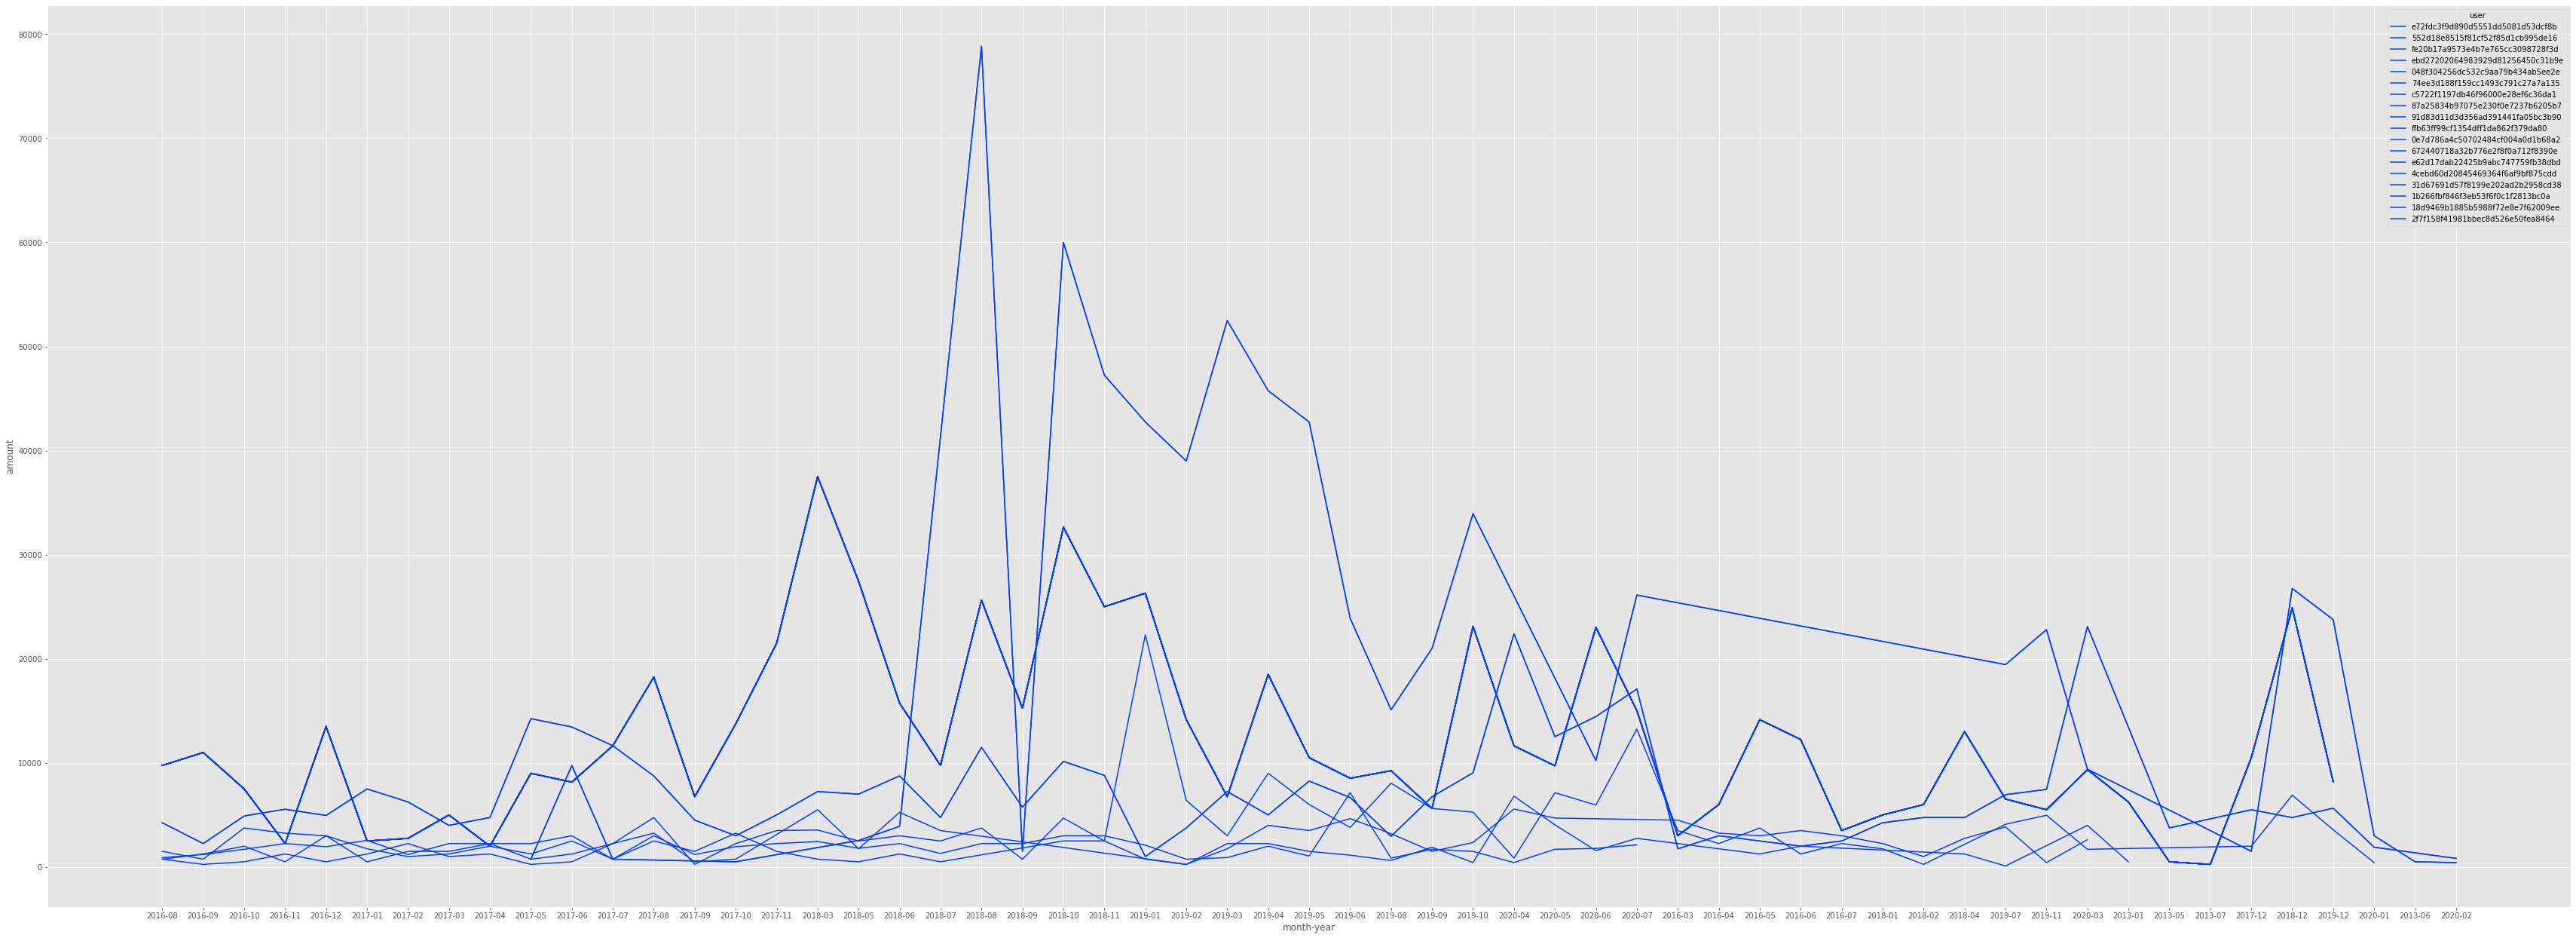

In [69]:
plt.figure(figsize=(60,22))
for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year',inplace=True)
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')

## User Location

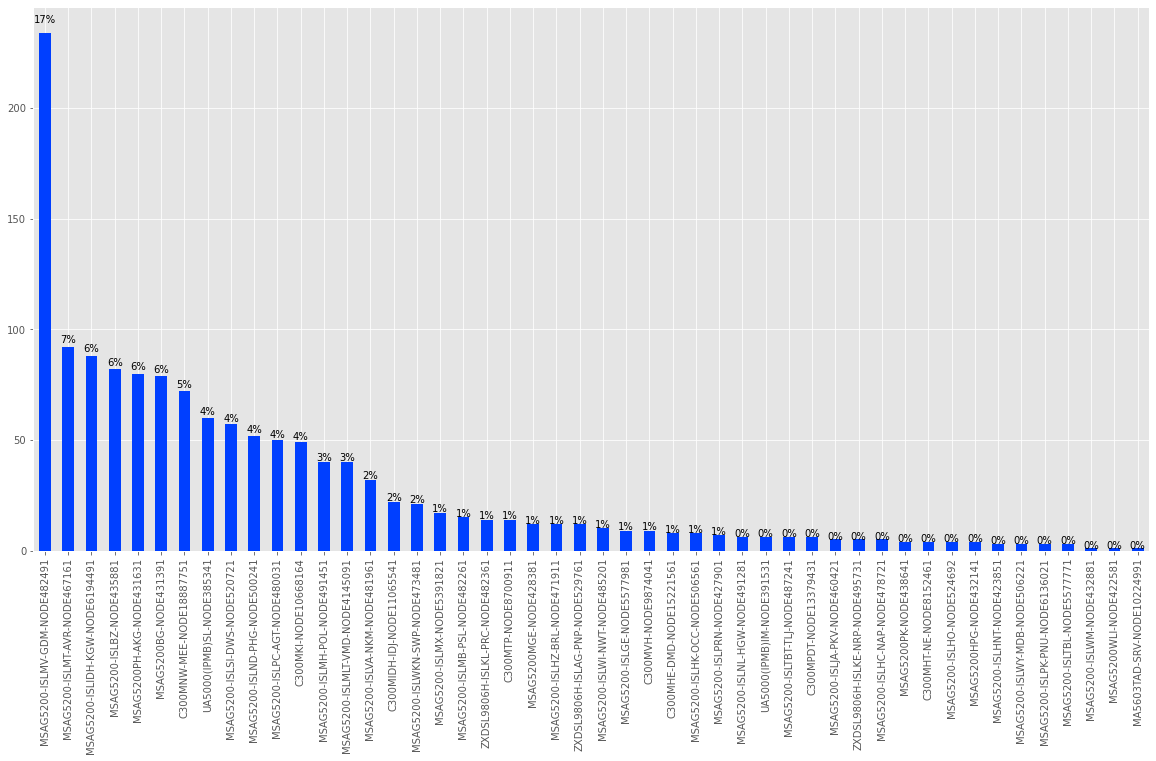

In [70]:
ax =cluster_1["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

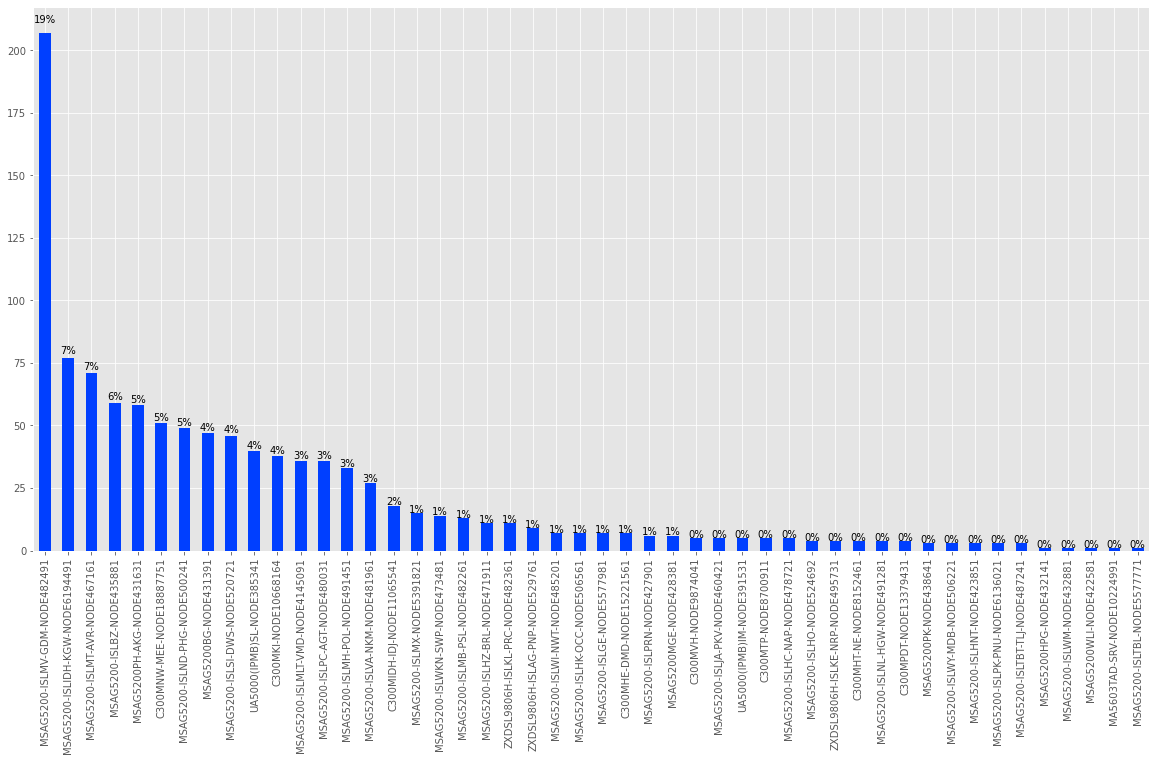

In [71]:
ax =cluster_1_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

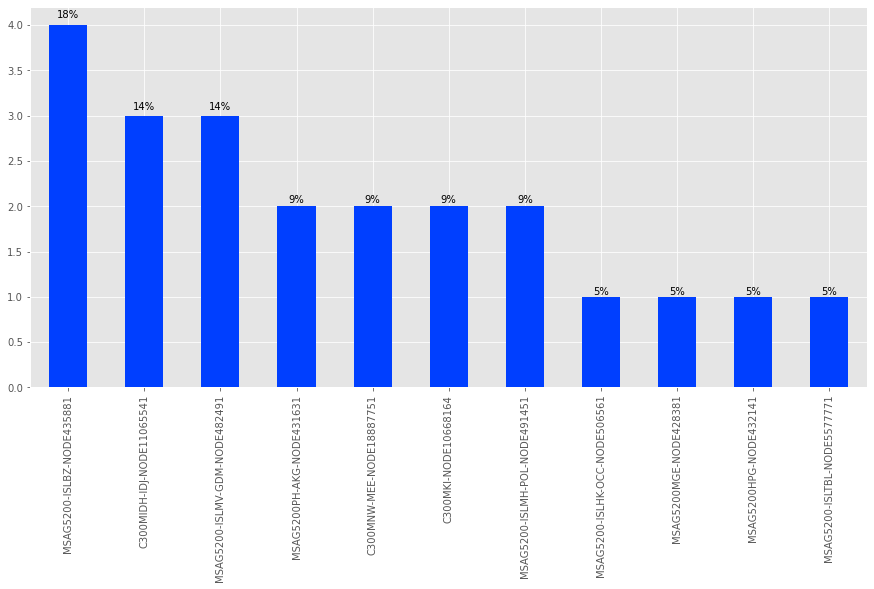

In [72]:
ax =cluster_1_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play BV customers

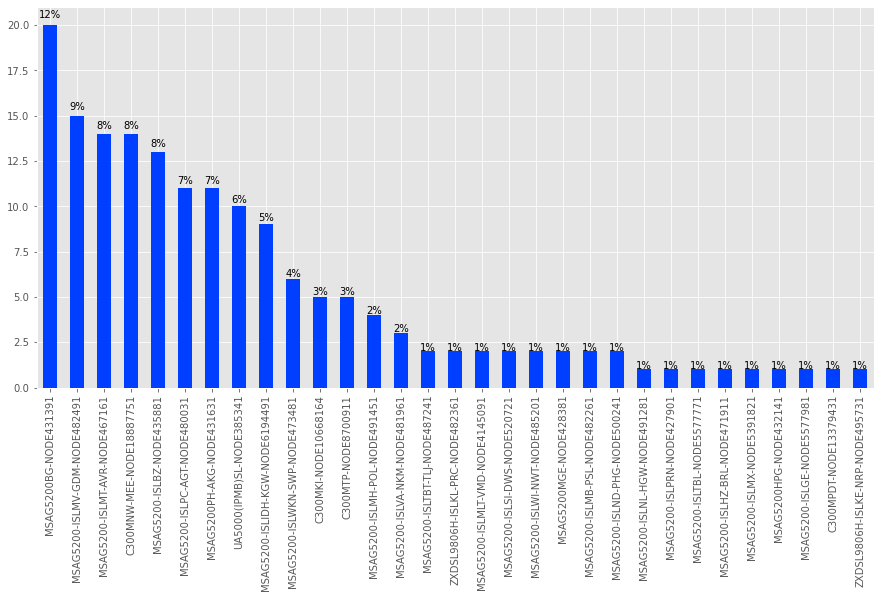

In [73]:
ax =cluster_1_bb_dp["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

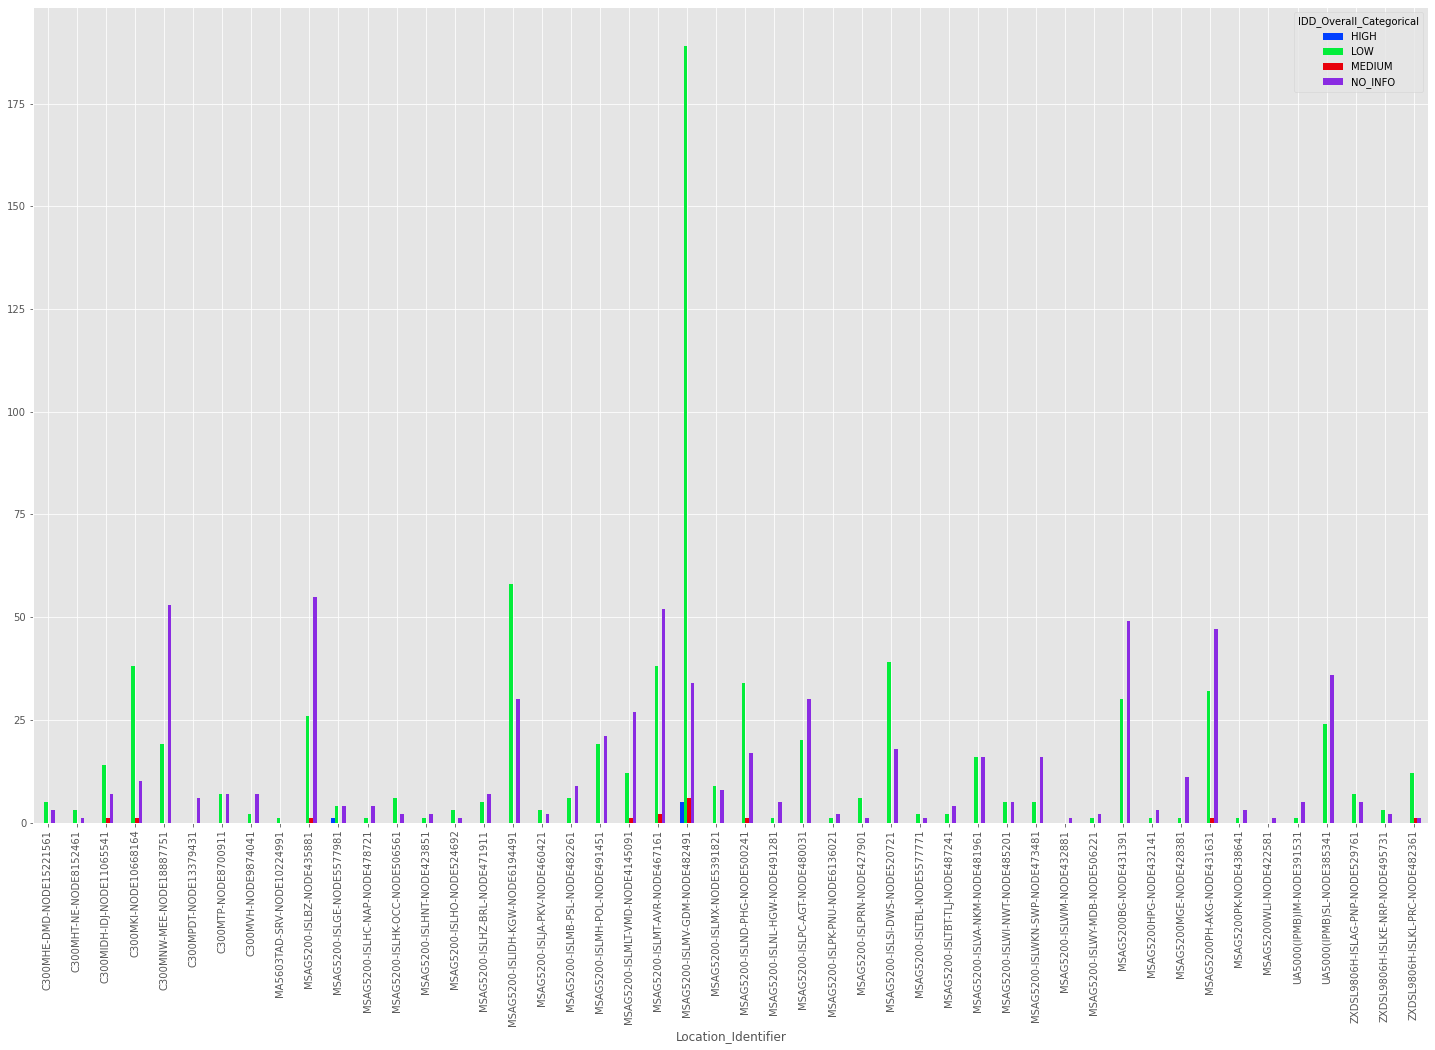

In [74]:
#ax =cluster_1[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_1[(cluster_1["Location_Identifier"] != "NO_INFO")].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

<ipython-input-75-8d254992a339>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(1, 0, 'MSAG5200-ISLHK-OCC-NODE506561'),
 Text(2, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(3, 0, 'MSAG5200-ISLHC-NAP-NODE478721'),
 Text(4, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(5, 0, 'MSAG5200PK-NODE438641'),
 Text(6, 0, 'MSAG5200-ISLPK-PNU-NODE6136021'),
 Text(7, 0, 'MSAG5200WLI-NODE422581'),
 Text(8, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(9, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(10, 0, 'C300MKI-NODE10668164'),
 Text(11, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(12, 0, 'MSAG5200-ISLHO-NODE524692'),
 Text(13, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(14, 0, 'MSAG5200-ISLJA-PKV-NODE460421'),
 Text(15, 0, 'MSAG5200-ISLPRN-NODE427901'),
 Text(16, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(17, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(18, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(19, 0, 'MA5603TAD-SRV-NODE10224991'),
 Text(20, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(21, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(22, 0

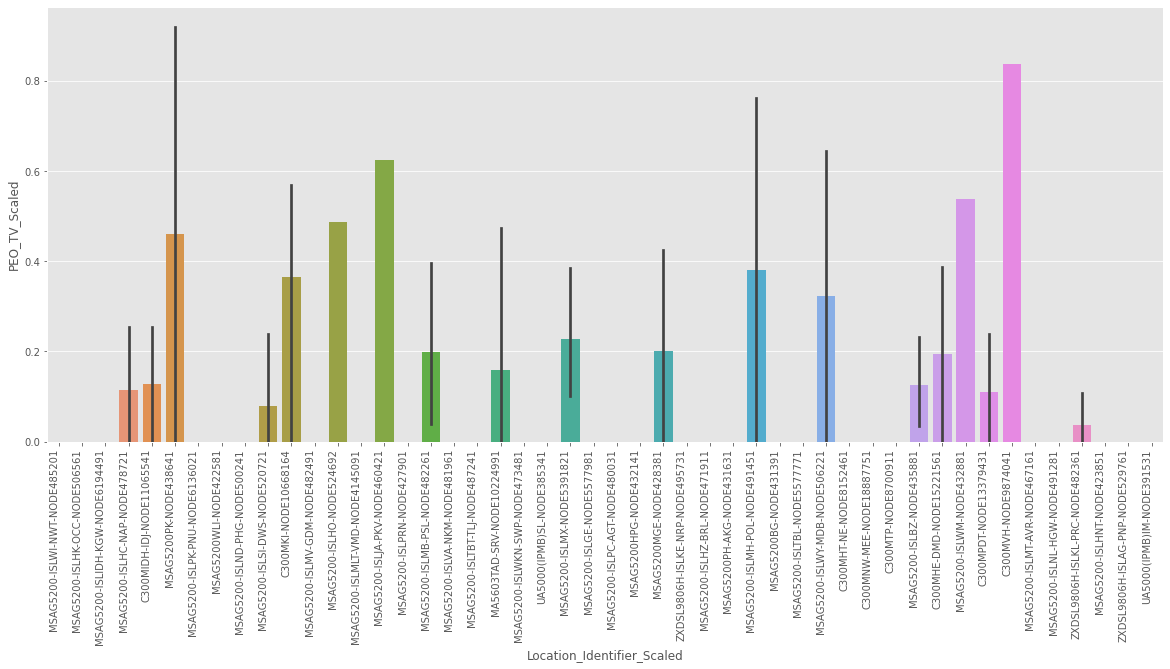

In [75]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_1[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [76]:
location_arr = cluster_1["Location_Identifier"].unique()

<ipython-input-77-f8e68635a657>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



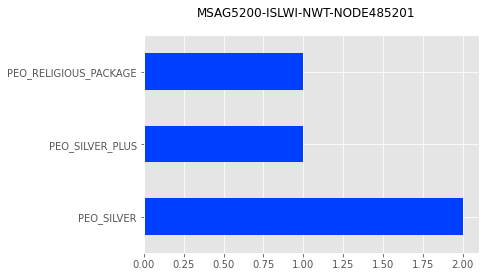

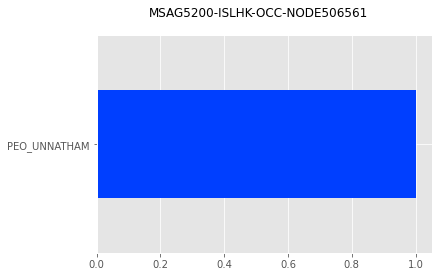

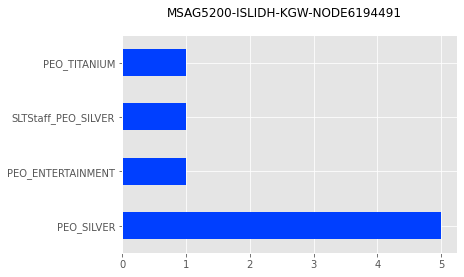

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

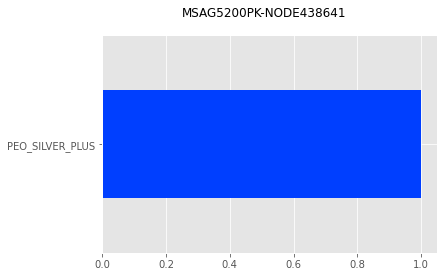

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

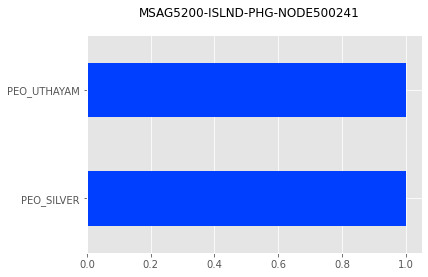

<Figure size 432x288 with 0 Axes>

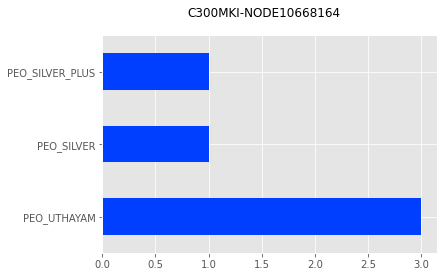

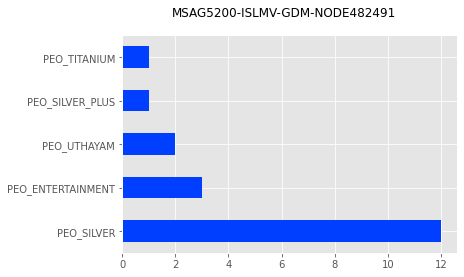

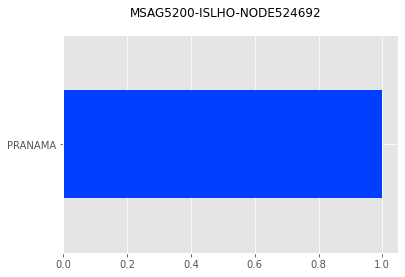

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

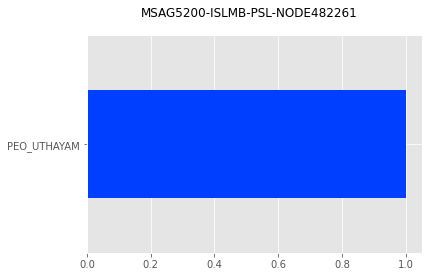

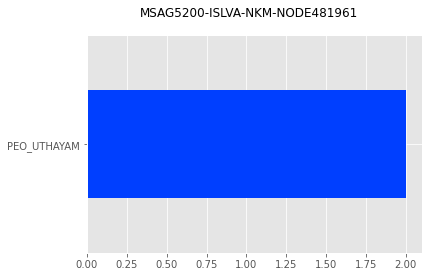

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

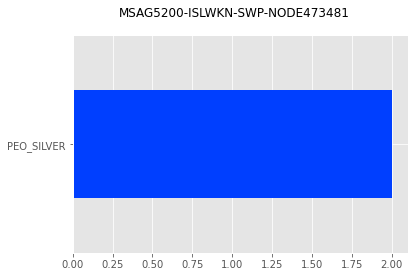

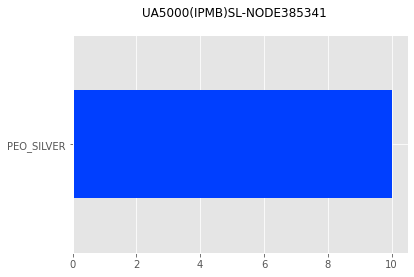

<Figure size 432x288 with 0 Axes>

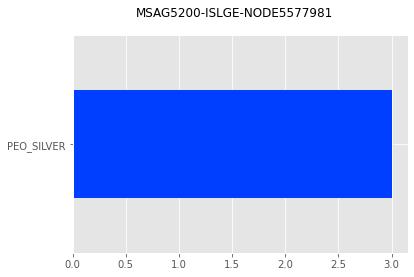

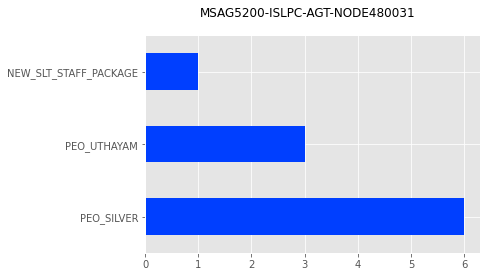

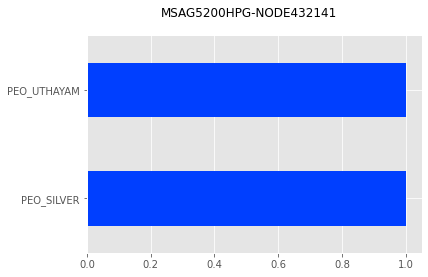

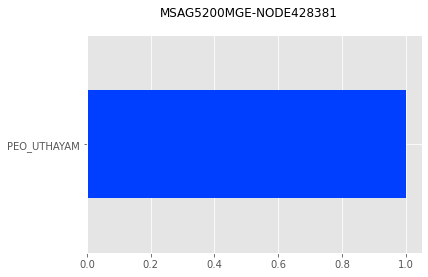

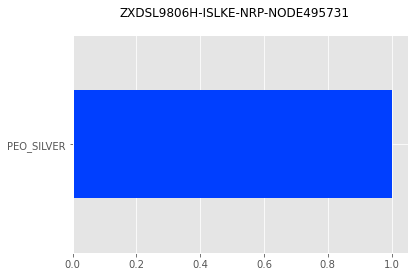

<Figure size 432x288 with 0 Axes>

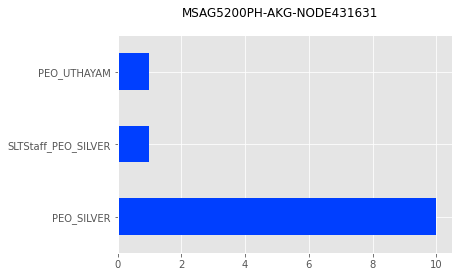

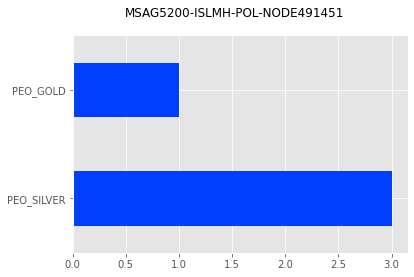

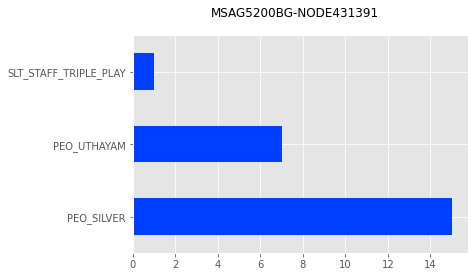

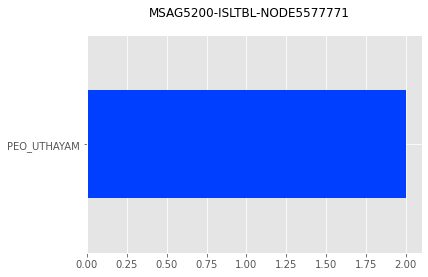

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

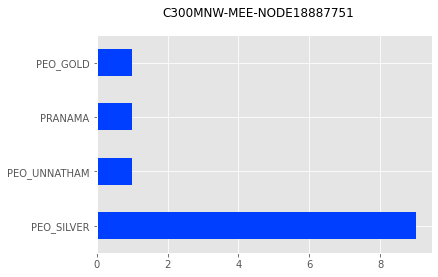

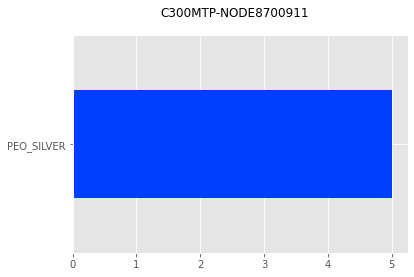

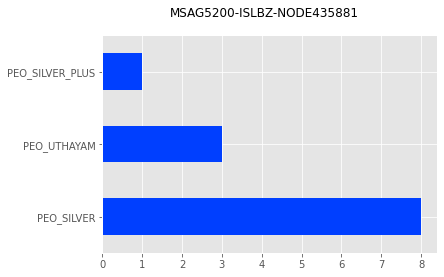

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

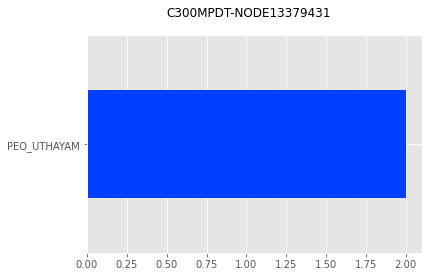

<Figure size 432x288 with 0 Axes>

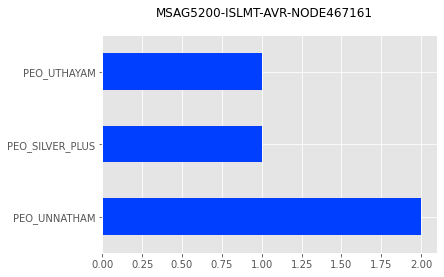

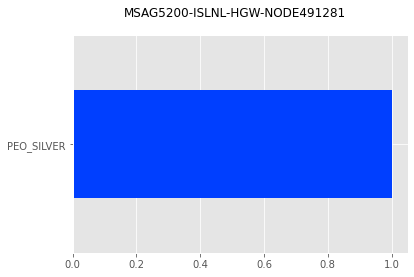

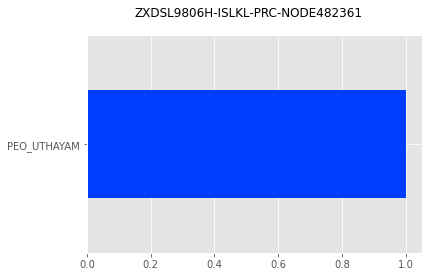

<Figure size 432x288 with 0 Axes>

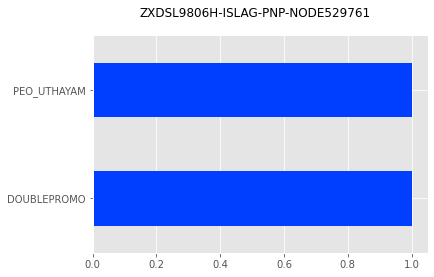

<Figure size 432x288 with 0 Axes>

In [77]:
for loc in location_arr:
    user_loc_df = cluster_1[((cluster_1["Location_Identifier"]==loc) & (cluster_1["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-78-0bf32acdb903>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

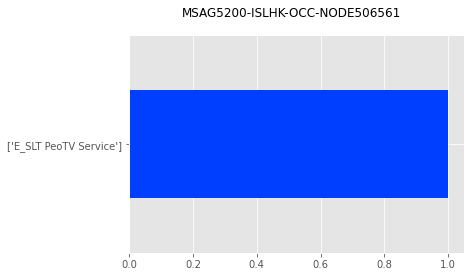

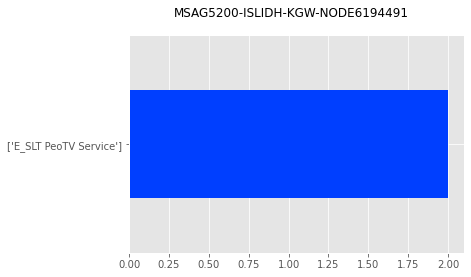

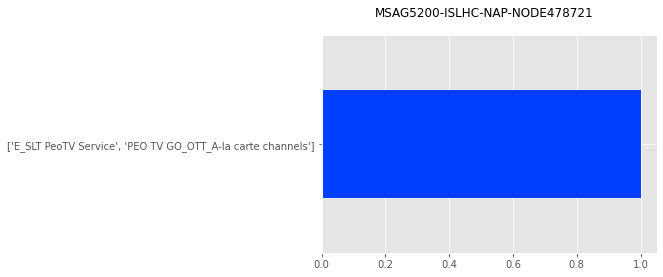

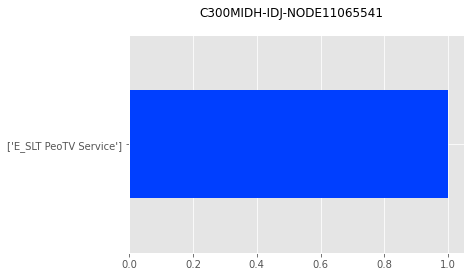

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

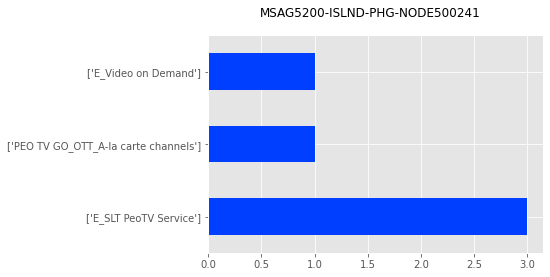

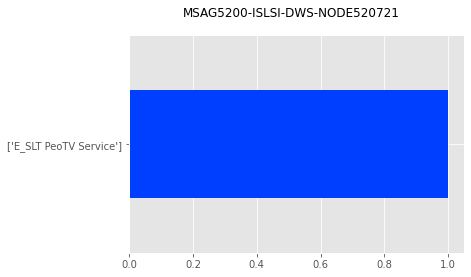

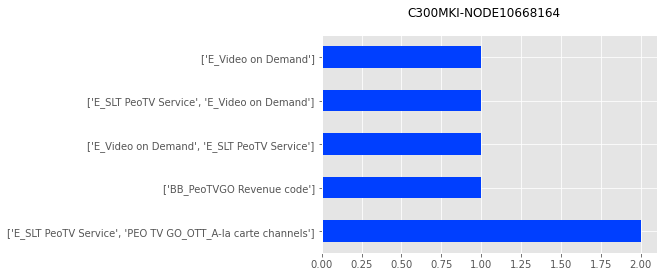

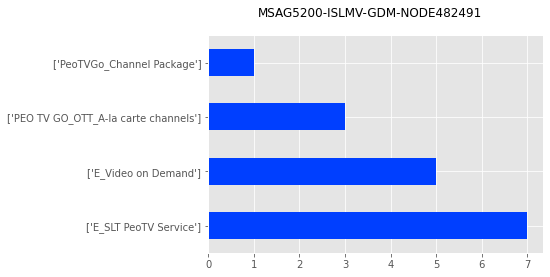

<Figure size 432x288 with 0 Axes>

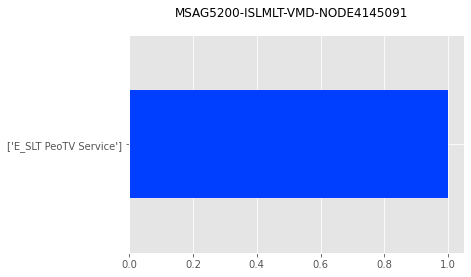

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

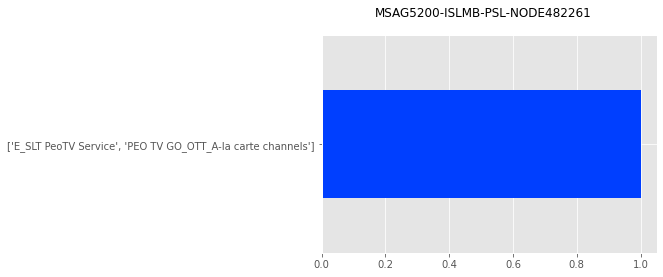

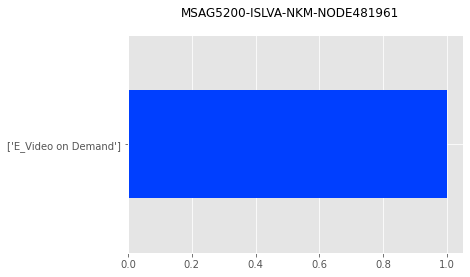

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

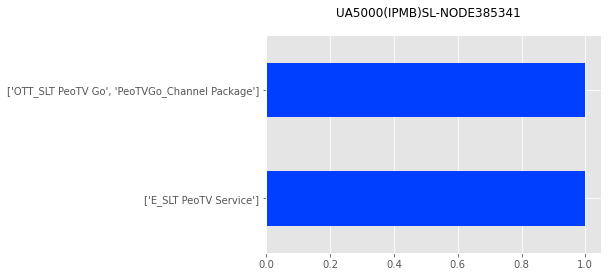

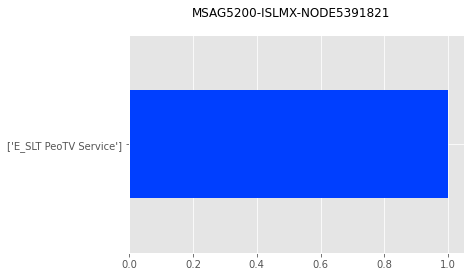

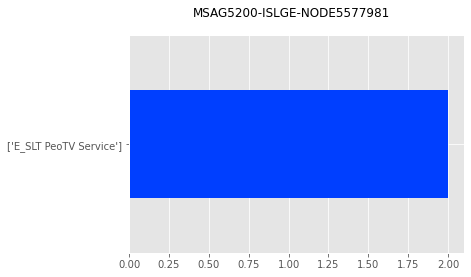

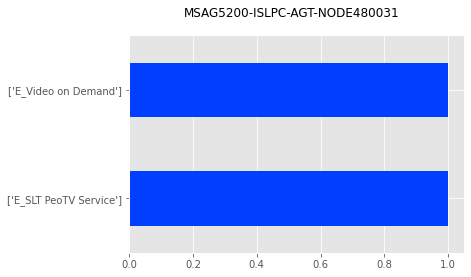

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

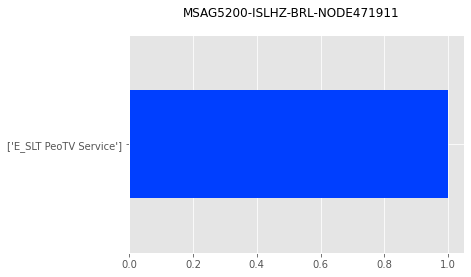

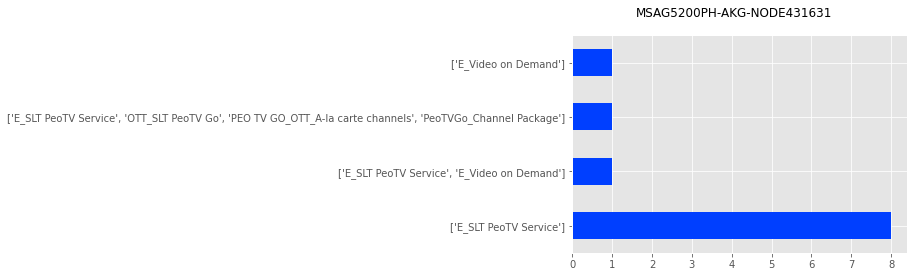

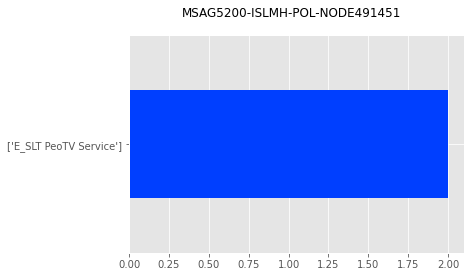

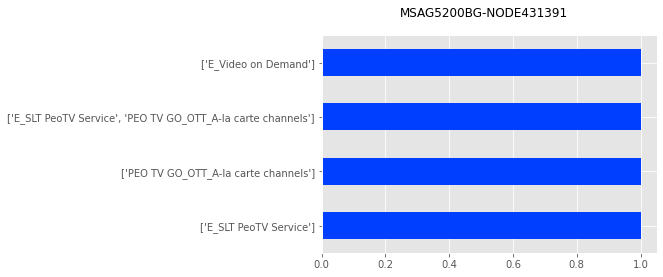

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

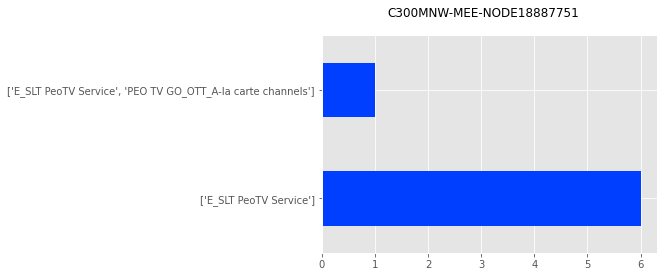

<Figure size 432x288 with 0 Axes>

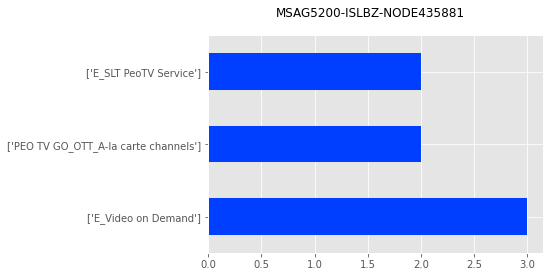

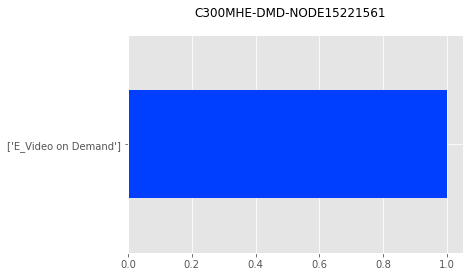

<Figure size 432x288 with 0 Axes>

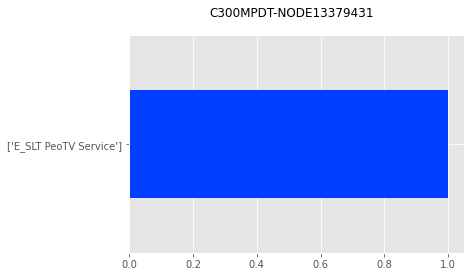

<Figure size 432x288 with 0 Axes>

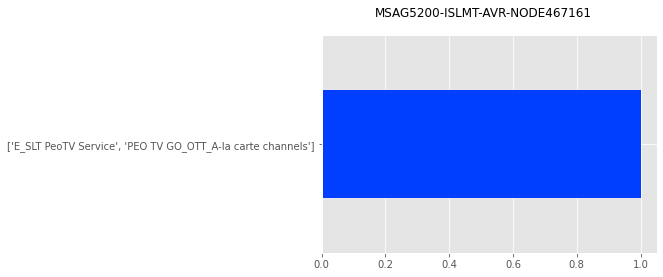

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

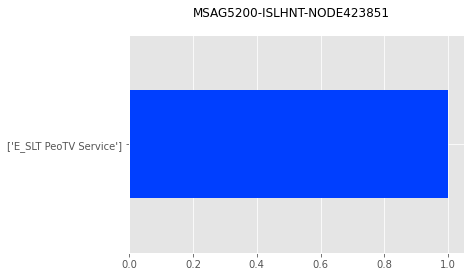

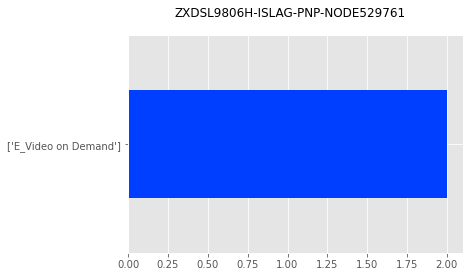

<Figure size 432x288 with 0 Axes>

In [78]:
for loc in location_arr:
    user_loc_df = cluster_1[((cluster_1["Location_Identifier"]==loc) & (cluster_1["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-79-0445f04f24fb>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



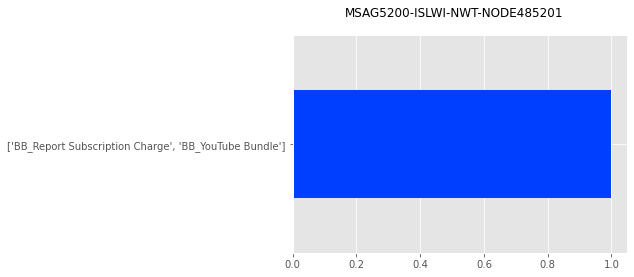

<Figure size 432x288 with 0 Axes>

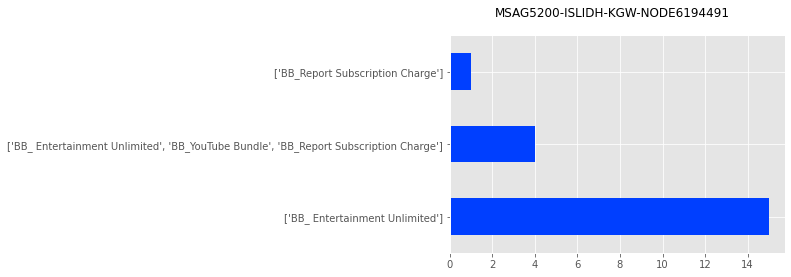

<Figure size 432x288 with 0 Axes>

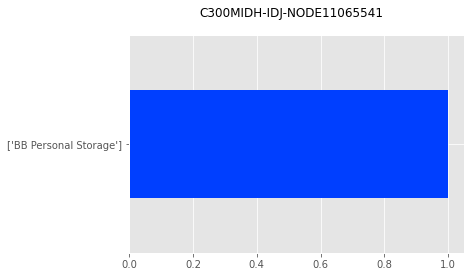

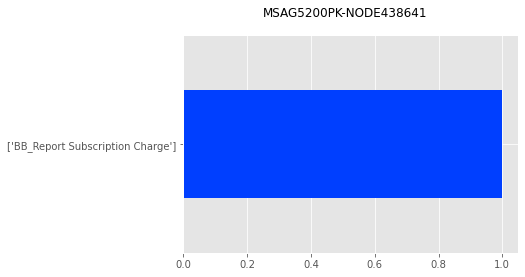

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

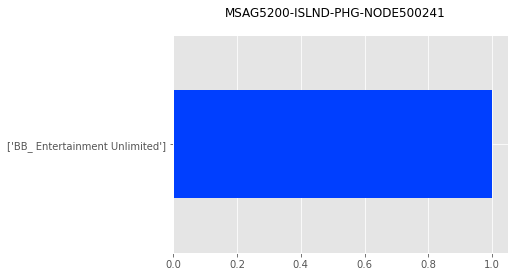

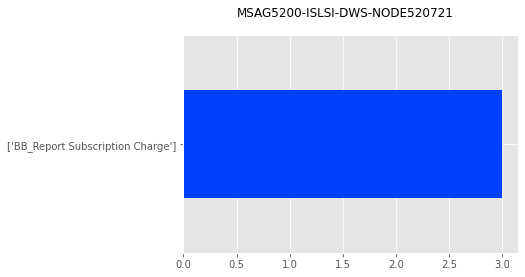

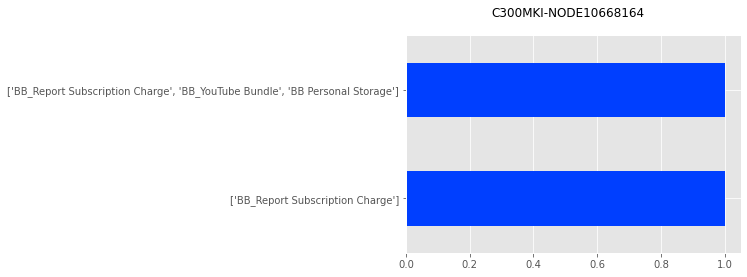

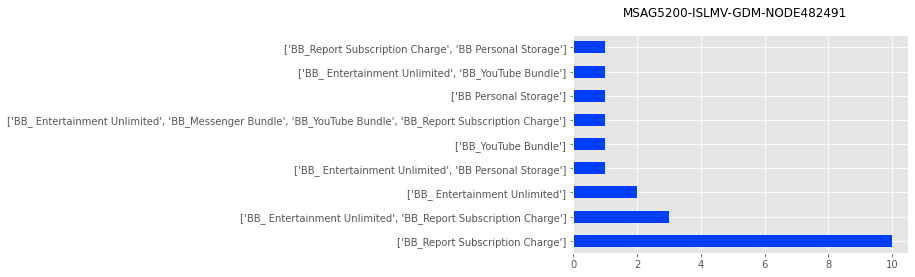

<Figure size 432x288 with 0 Axes>

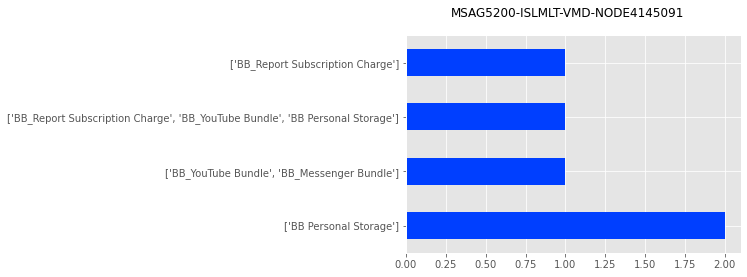

<Figure size 432x288 with 0 Axes>

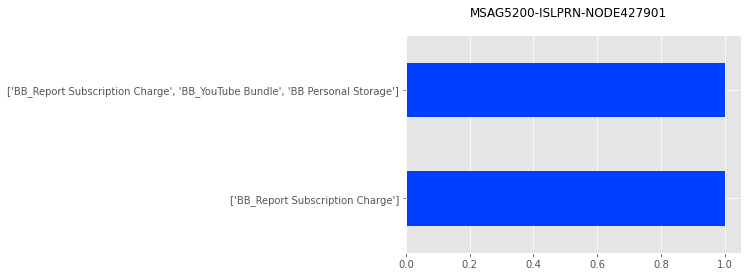

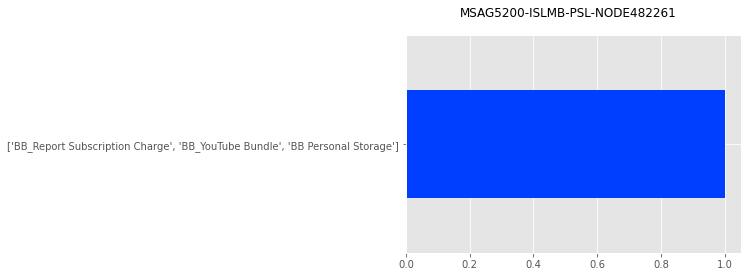

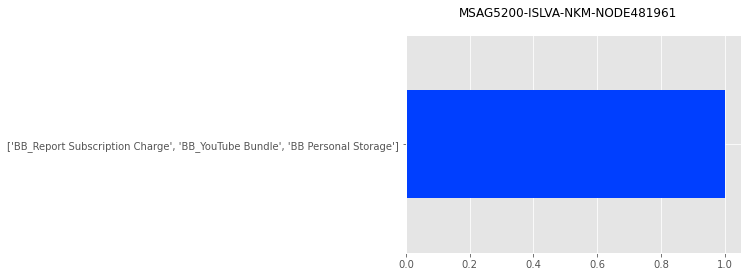

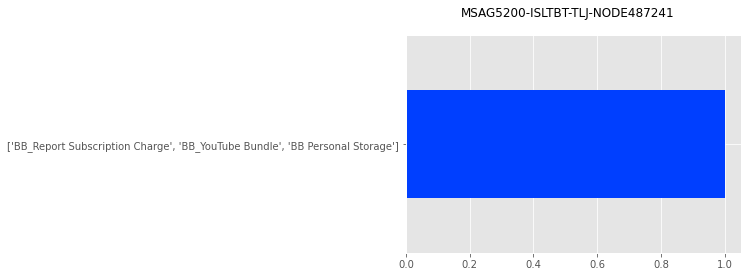

<Figure size 432x288 with 0 Axes>

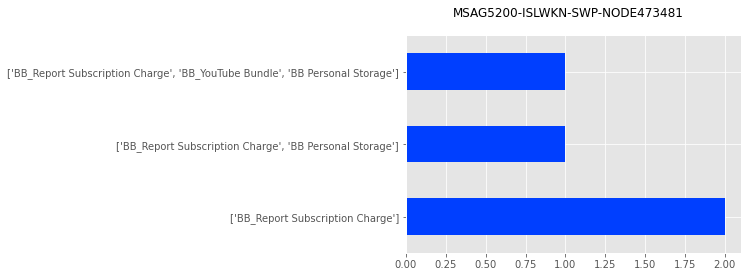

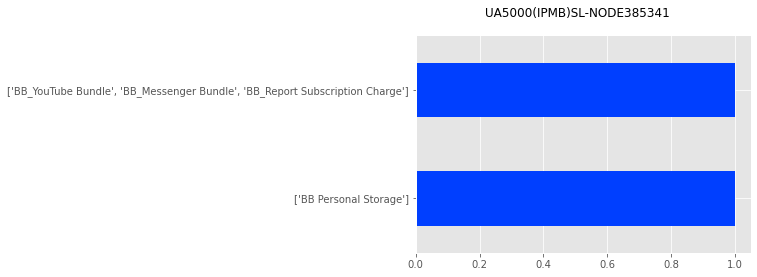

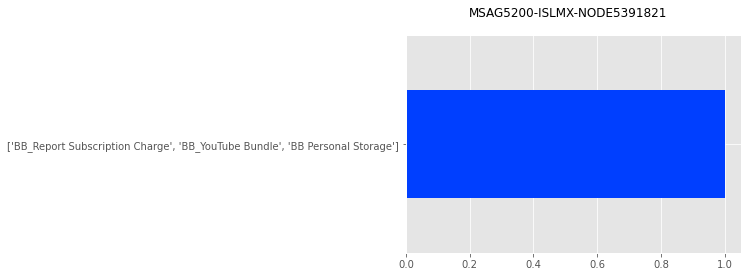

<Figure size 432x288 with 0 Axes>

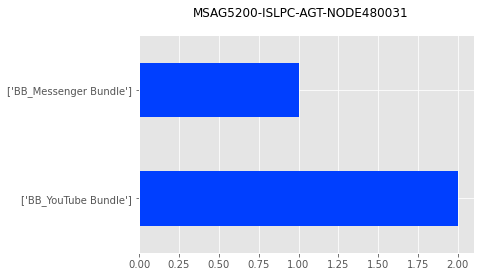

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

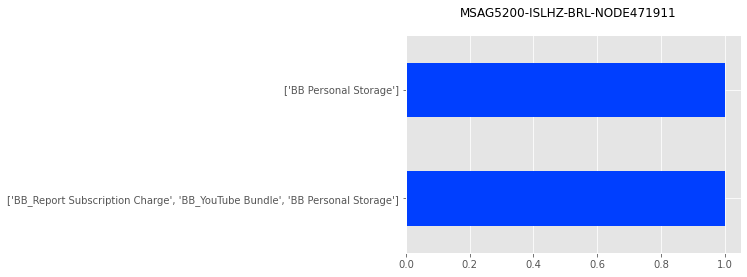

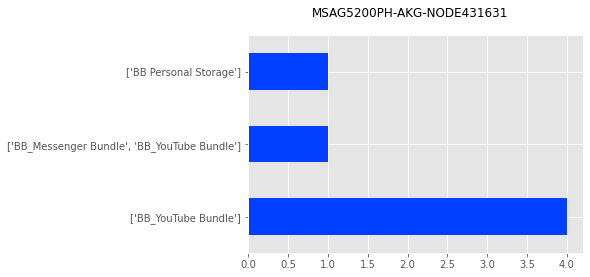

<Figure size 432x288 with 0 Axes>

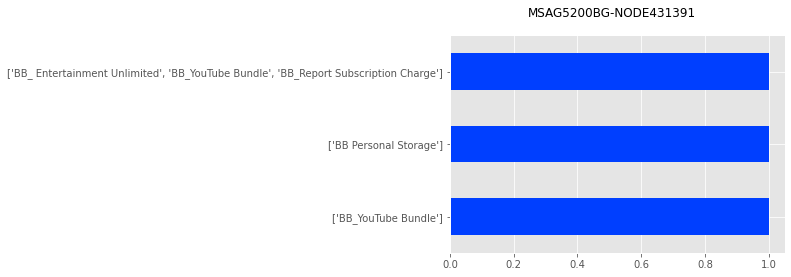

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

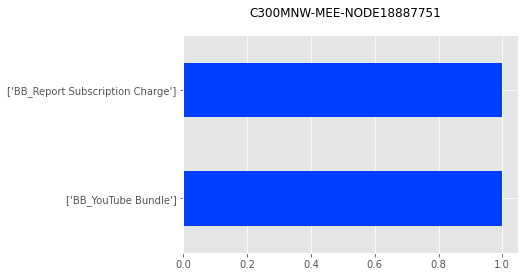

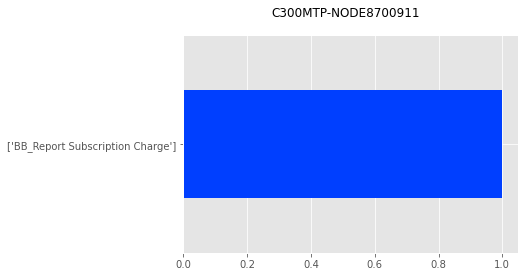

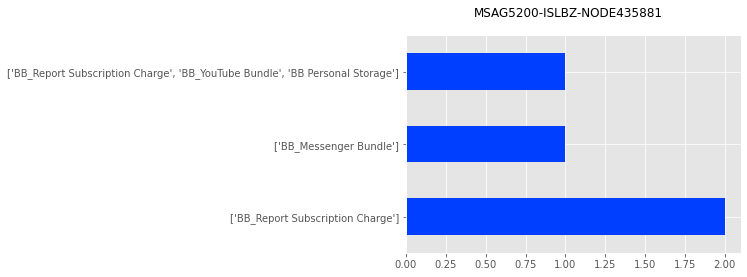

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

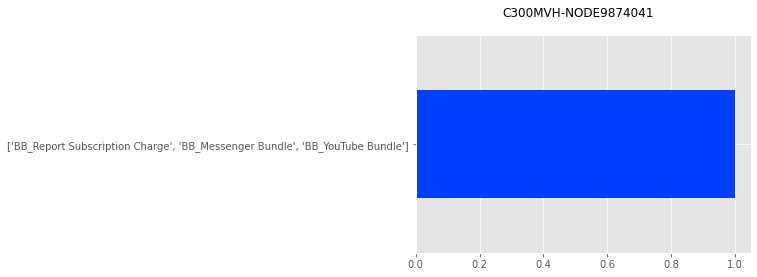

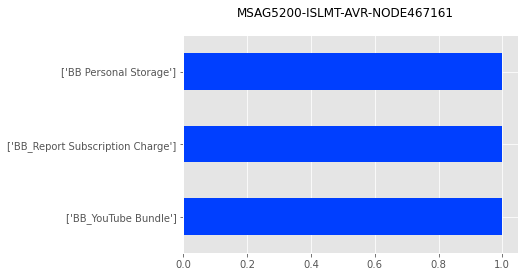

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

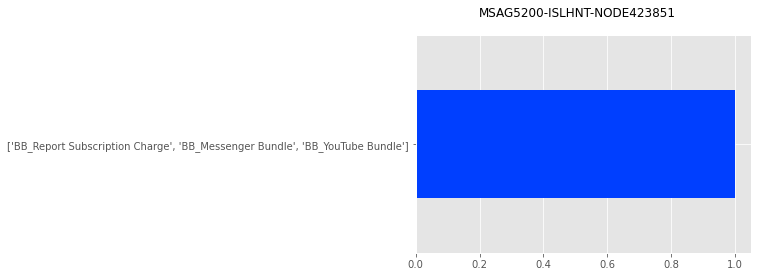

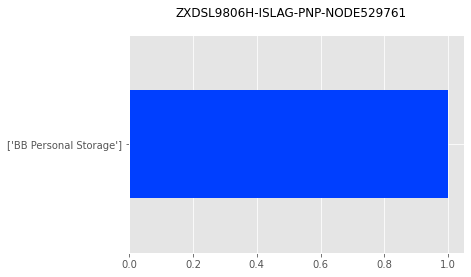

<Figure size 432x288 with 0 Axes>

In [79]:
for loc in location_arr:
    user_loc_df = cluster_1[((cluster_1["Location_Identifier"]==loc) & (cluster_1["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

<AxesSubplot:ylabel='GENDER'>

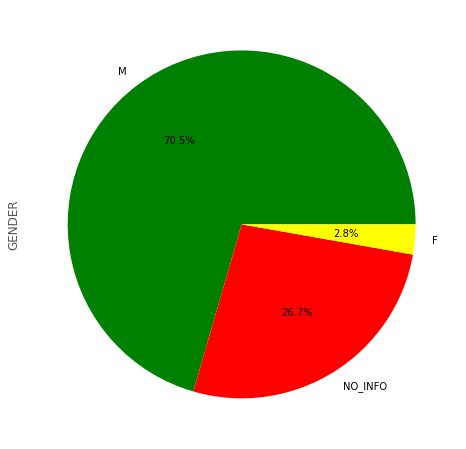

In [143]:
cluster_1["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['green','red','yellow'])

<AxesSubplot:ylabel='GENDER'>

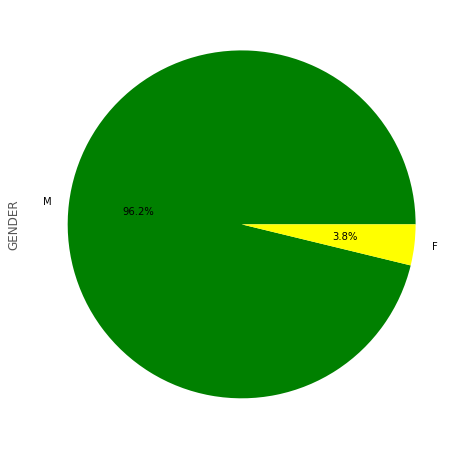

In [142]:
cluster_1[(cluster_1["GENDER"]!= "NO_INFO")]["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['green','yellow'])

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

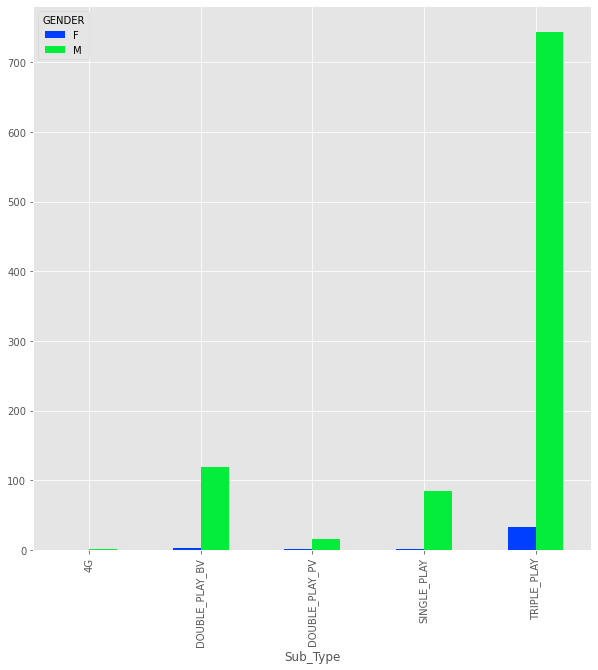

In [83]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

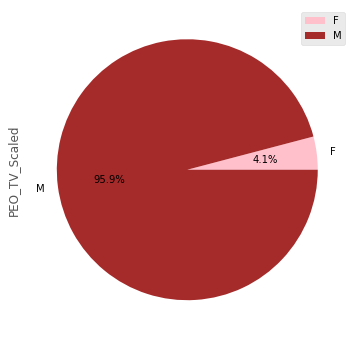

In [84]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

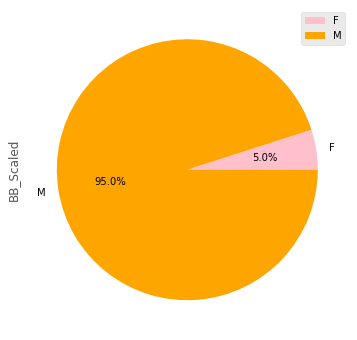

In [85]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

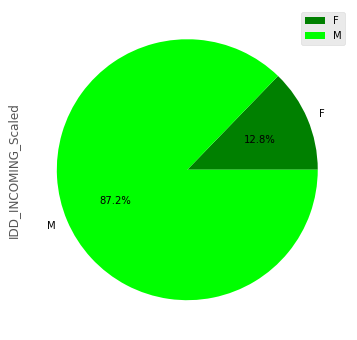

In [86]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("green","lime"), subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

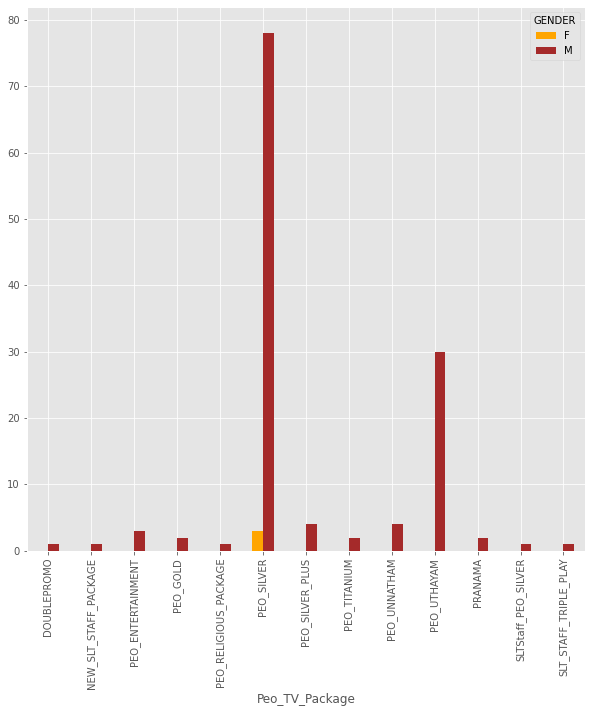

In [87]:
 cluster_1[((cluster_1["GENDER"] != "NO_INFO") &(cluster_1["Peo_TV_Package"] != "NO_INFO"))].groupby(["Peo_TV_Package", "GENDER"]).size().unstack().plot.bar(figsize=(10,10),color=("orange", "brown"))

## AGE Analysis

In [88]:
cluster_1["AGE"].describe()

count    1002.000000
mean       58.136727
std        14.429486
min        22.000000
25%        48.000000
50%        57.000000
75%        68.000000
max       110.000000
Name: AGE, dtype: float64

In [89]:
bins = [0, 30,55,65,85,110]
cluster_1['AGE_Groups'] = pd.cut(cluster_1['AGE'], bins)

<ipython-input-89-0c2e78407b81>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

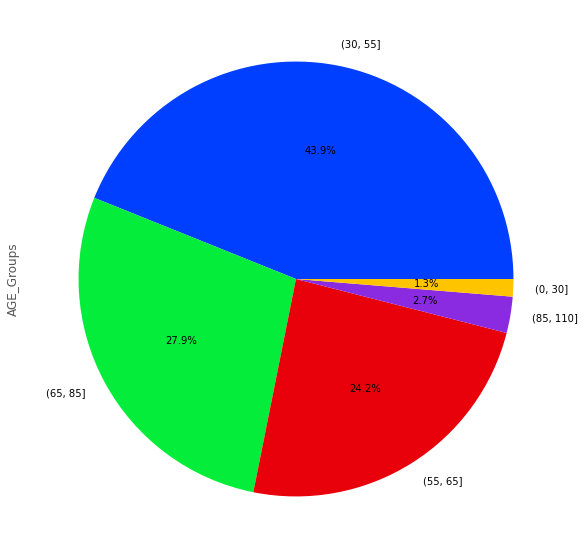

In [90]:
cluster_1["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

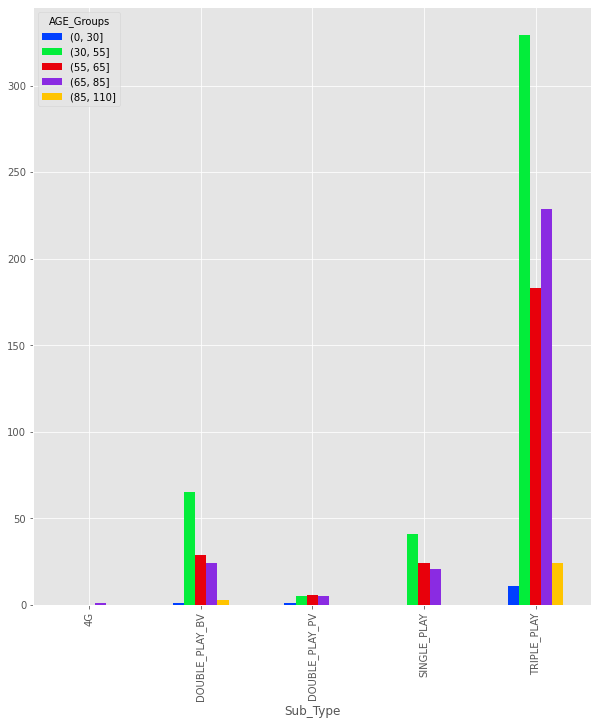

In [91]:
cluster_1.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

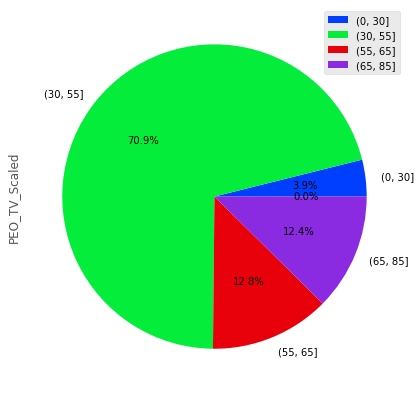

In [92]:
cluster_1[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

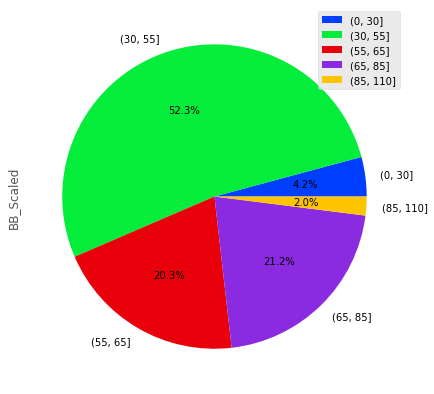

In [93]:
cluster_1[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

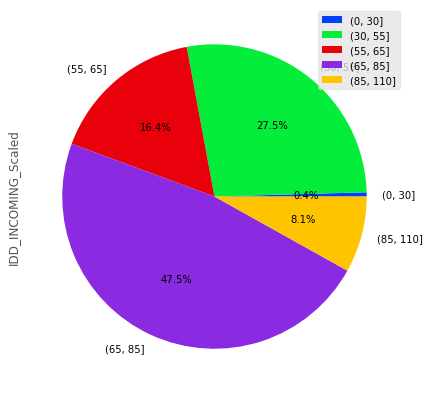

In [94]:
cluster_1[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

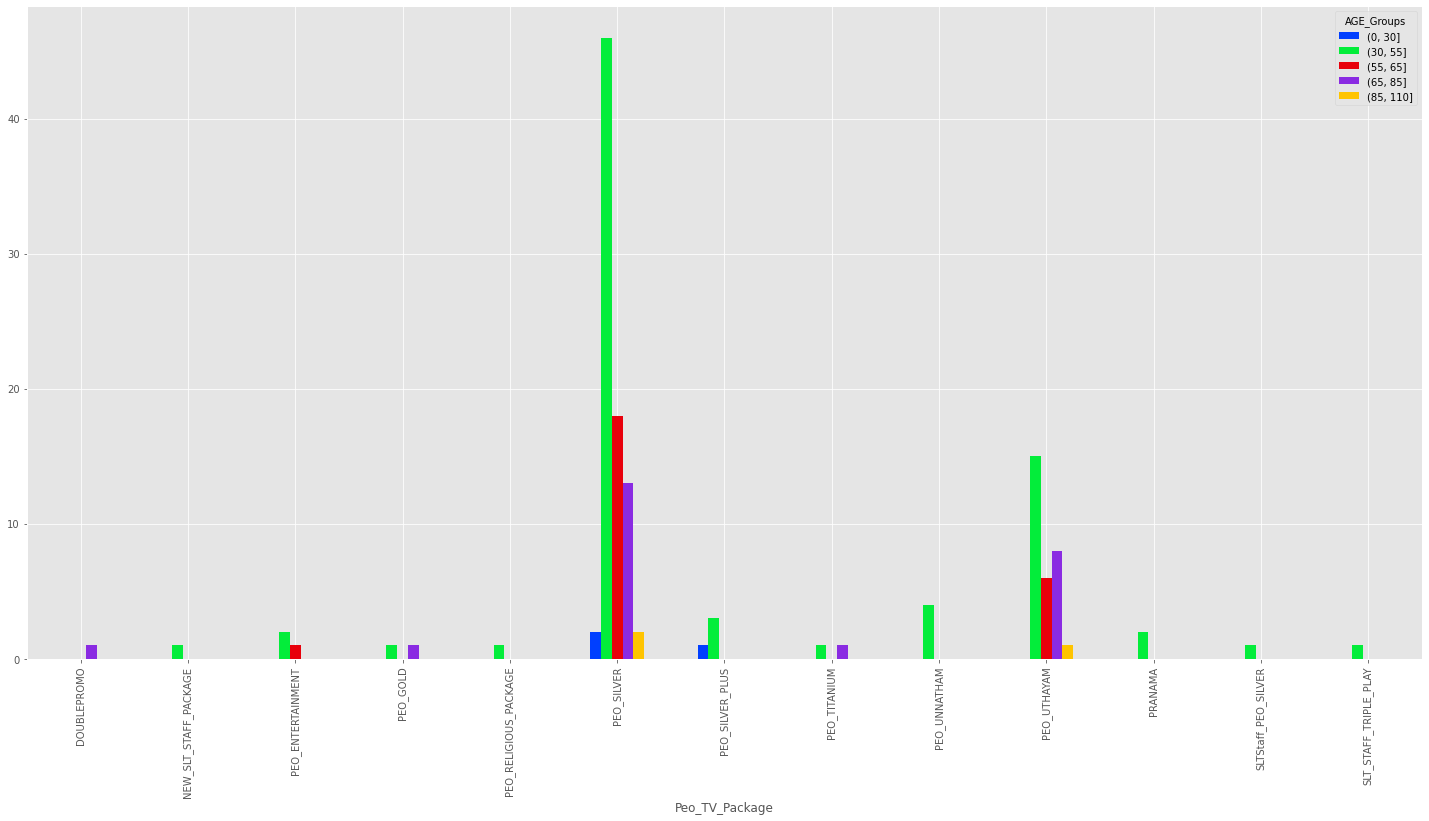

In [95]:
cluster_1[(cluster_1["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(25,12))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [146]:
cluster_1["Having_Insurance"].value_counts(normalize=True)

NO_INFO    0.926116
YES        0.073884
Name: Having_Insurance, dtype: float64

<AxesSubplot:xlabel='Having_Insurance'>

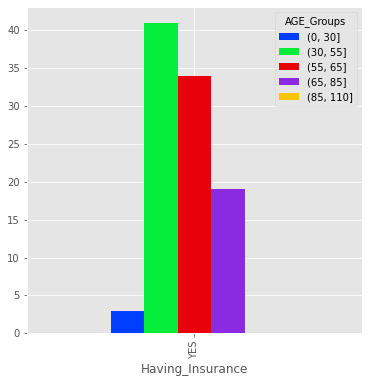

In [97]:
cluster_1[(cluster_1["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

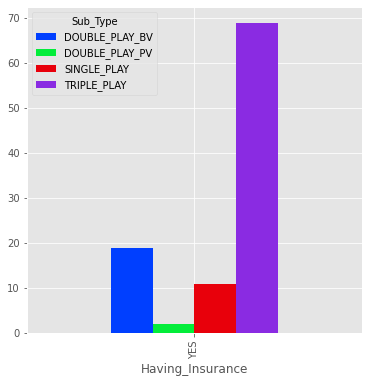

In [98]:
cluster_1[(cluster_1["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

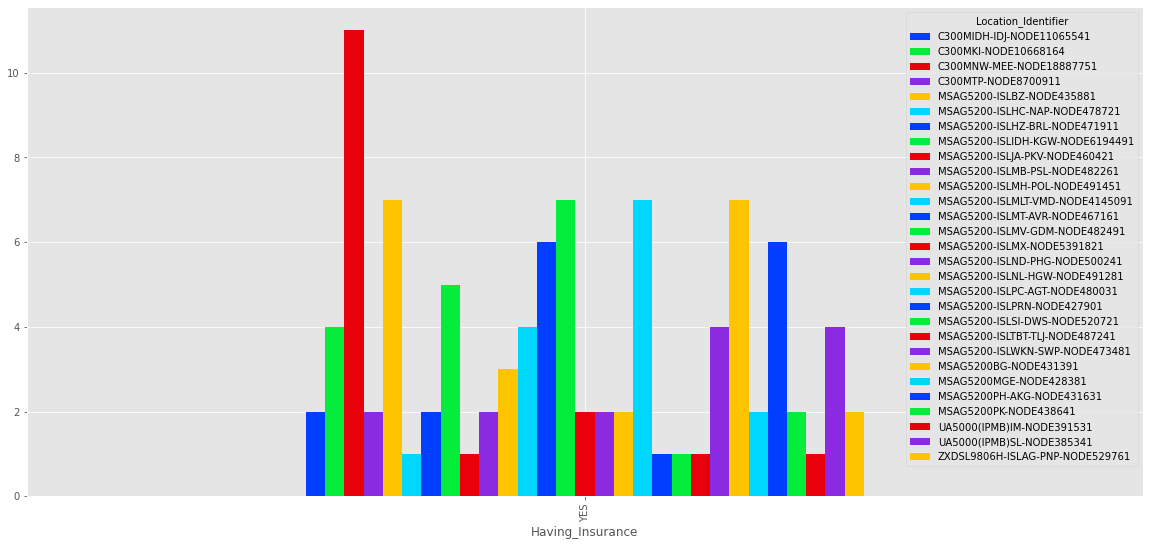

In [99]:
cluster_1[(cluster_1["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Senior citizens

In [147]:
cluster_1["Having_Senior_Citizen"].value_counts(normalize=True)

NO_INFO    0.917337
YES        0.082663
Name: Having_Senior_Citizen, dtype: float64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

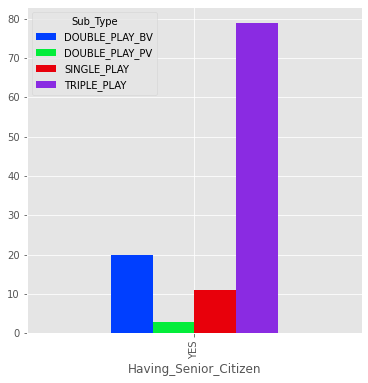

In [101]:
cluster_1[(cluster_1["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

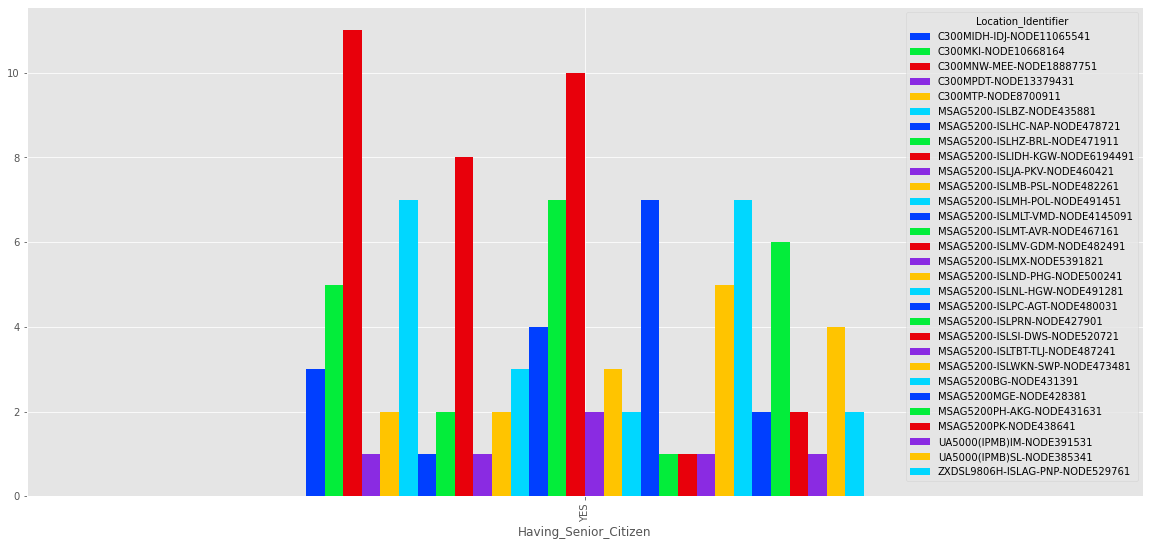

In [102]:
cluster_1[(cluster_1["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [148]:
cluster_1["Having_Family_Member_Abroad"].value_counts(normalize=True)

NO_INFO    0.680322
YES        0.319678
Name: Having_Family_Member_Abroad, dtype: float64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

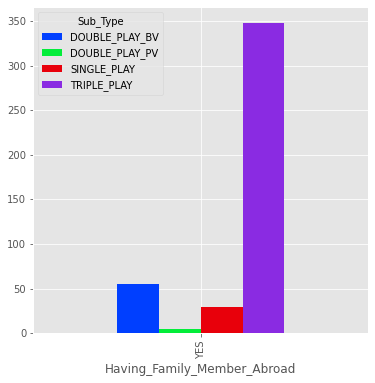

In [104]:
cluster_1[(cluster_1["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

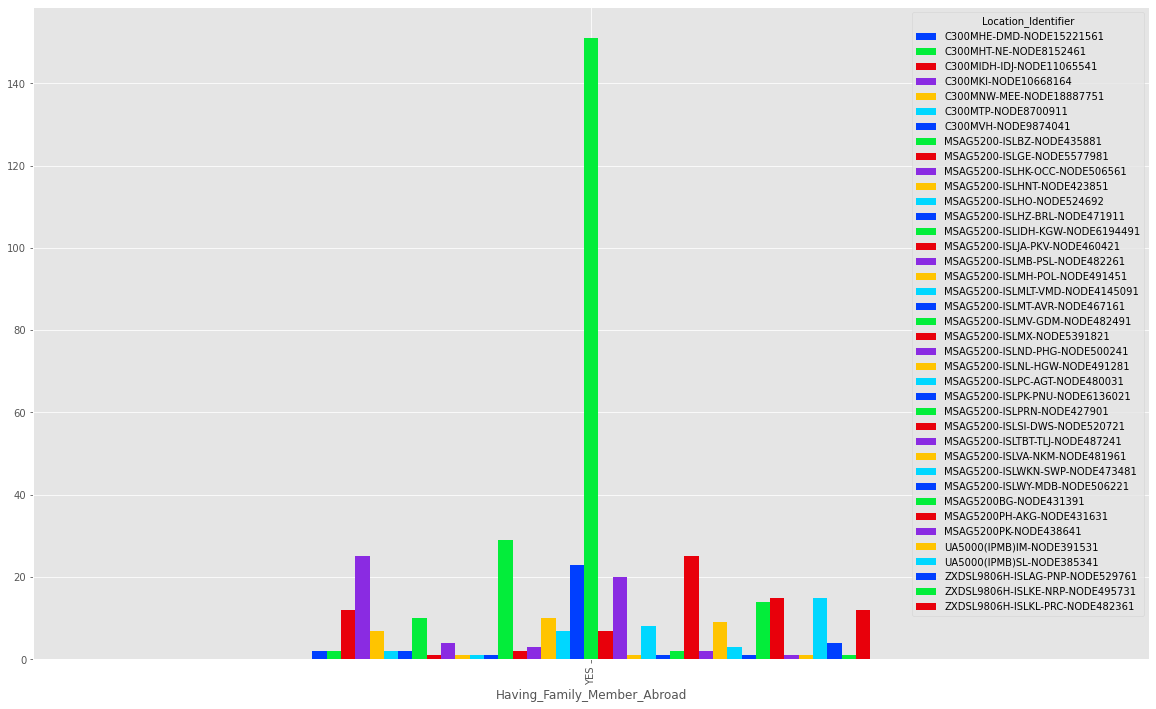

In [105]:
cluster_1[(cluster_1["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [149]:
cluster_1["Having_Working_Professionals"].value_counts(normalize=True)

NO_INFO    0.930505
YES        0.069495
Name: Having_Working_Professionals, dtype: float64

<AxesSubplot:xlabel='Having_Working_Professionals'>

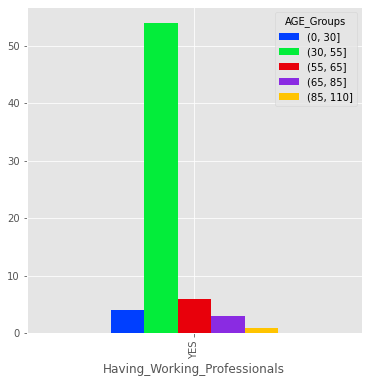

In [107]:
cluster_1[(cluster_1["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

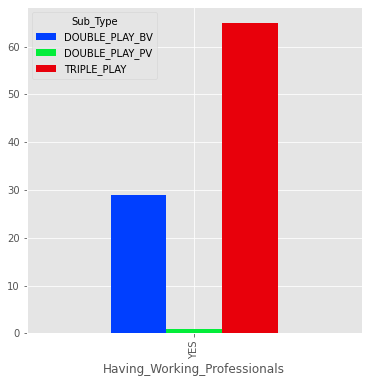

In [108]:
cluster_1[(cluster_1["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

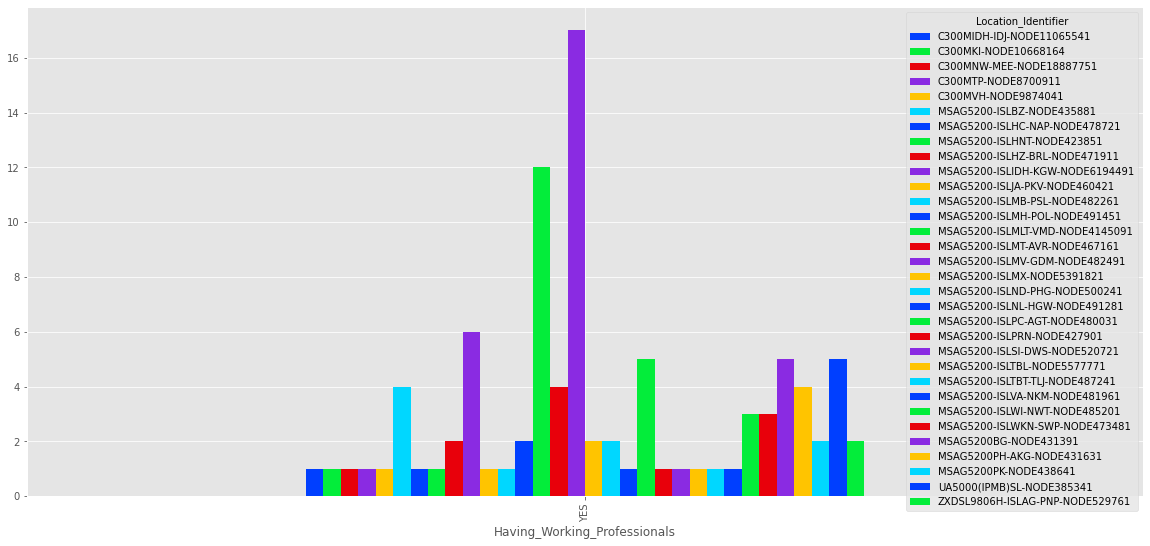

In [109]:
cluster_1[(cluster_1["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Teenagers Students

In [150]:
cluster_1["Having_Teenagers_Students"].value_counts(normalize=True)

NO_INFO    0.96196
YES        0.03804
Name: Having_Teenagers_Students, dtype: float64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

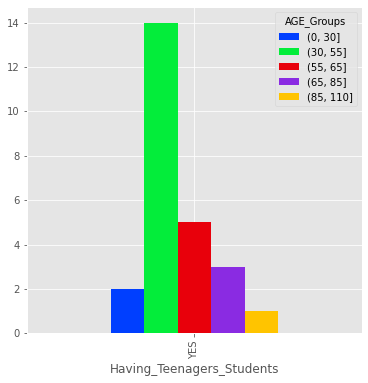

In [111]:
cluster_1[(cluster_1["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

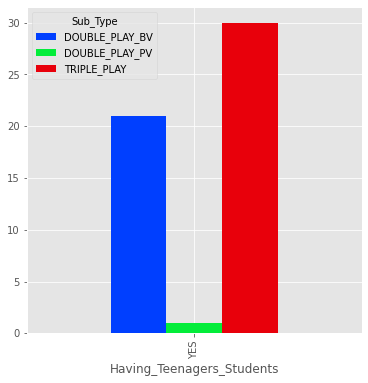

In [112]:
cluster_1[(cluster_1["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

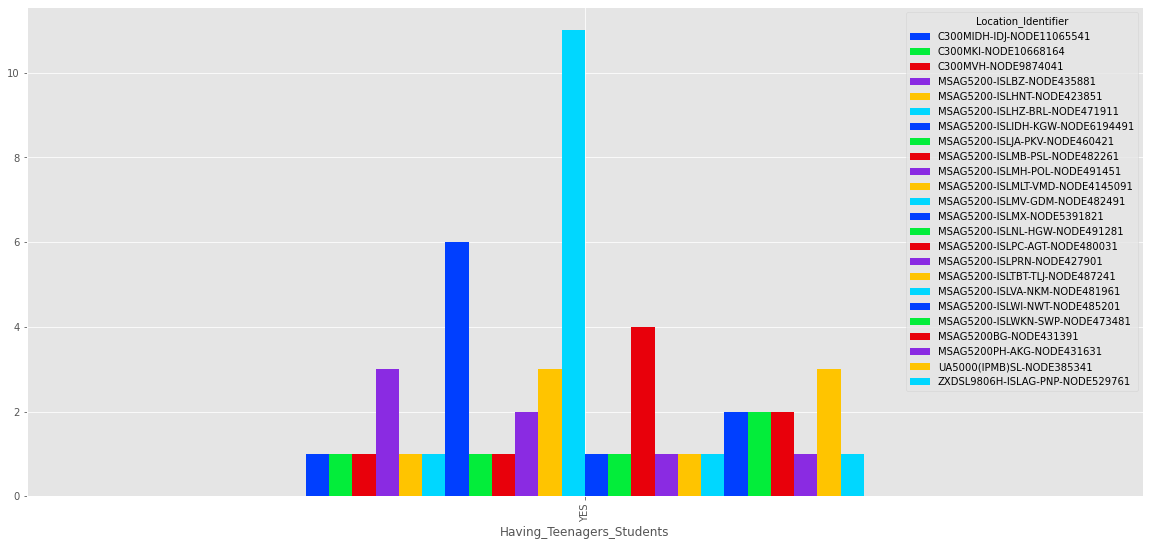

In [113]:
cluster_1[(cluster_1["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a Tamil customer

In [151]:
cluster_1["Tamil_Customer"].value_counts(normalize=True)

NO_INFO    0.973665
YES        0.026335
Name: Tamil_Customer, dtype: float64

<AxesSubplot:xlabel='Tamil_Customer'>

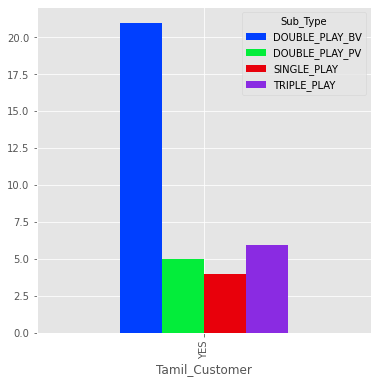

In [115]:
cluster_1[(cluster_1["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Tamil_Customer'>

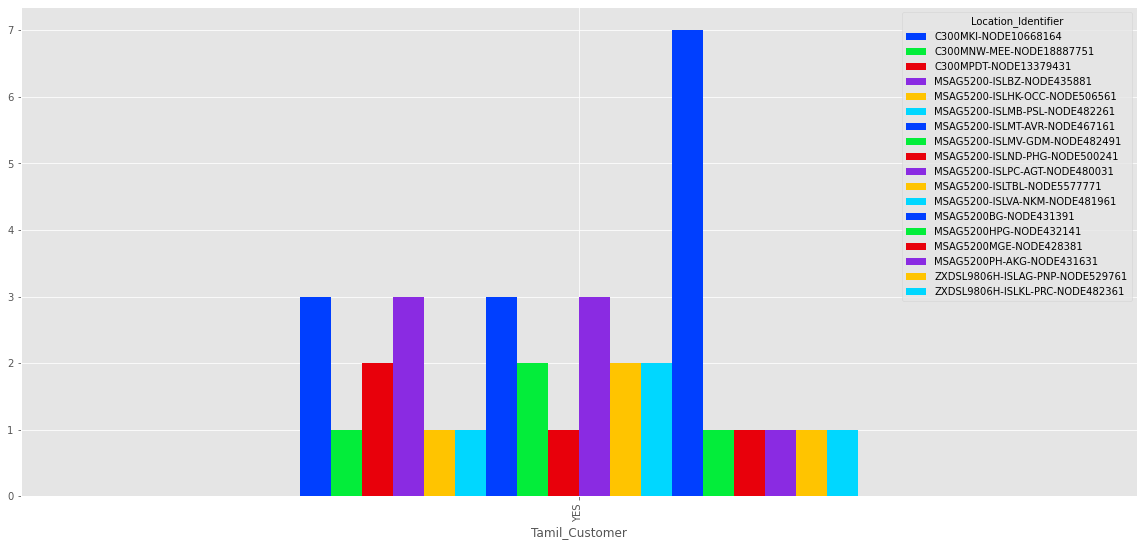

In [116]:
cluster_1[(cluster_1["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Kids at Home

In [152]:
cluster_1["Having_Kids_at_Home"].value_counts(normalize=True)

NO_INFO    0.970739
YES        0.029261
Name: Having_Kids_at_Home, dtype: float64

<AxesSubplot:xlabel='Having_Kids_at_Home'>

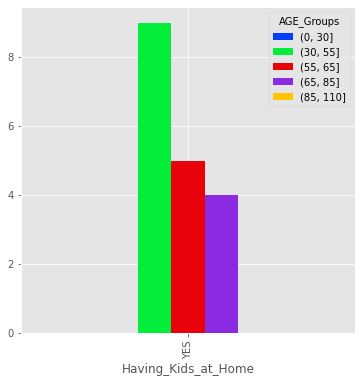

In [118]:
cluster_1[(cluster_1["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

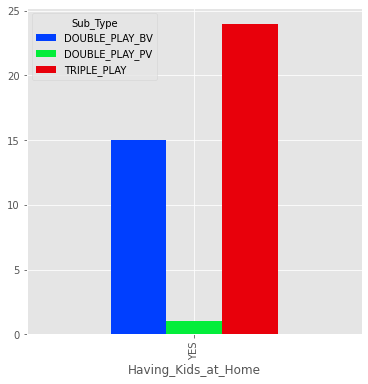

In [119]:
cluster_1[(cluster_1["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

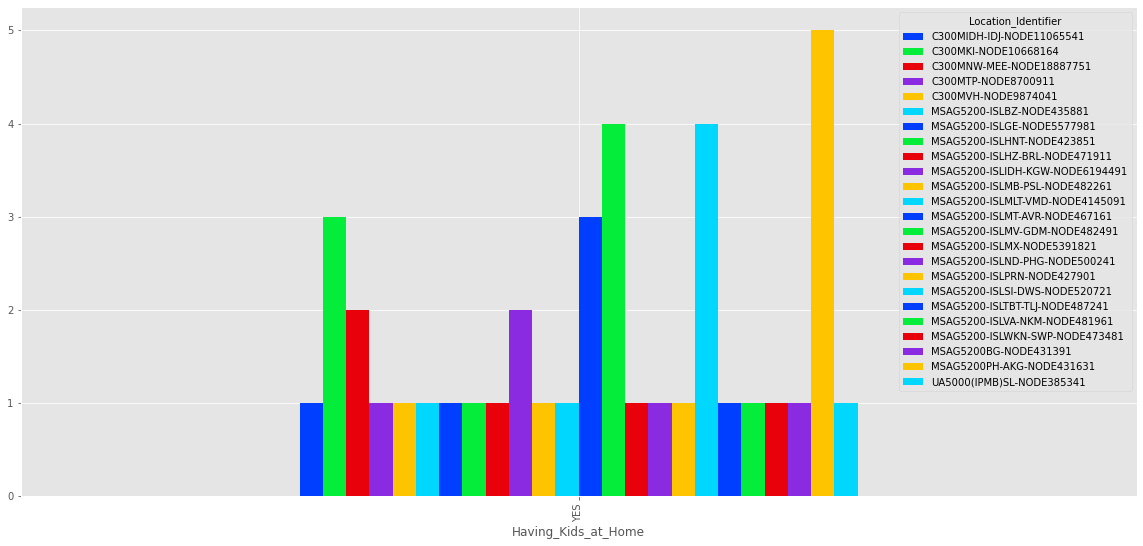

In [120]:
cluster_1[(cluster_1["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

### Identifying factors for recommending Packages for Cluster 1

#### Feasible locations to offer PeoTV

In [121]:
cluster_1_peo_loc = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY") | (cluster_1["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

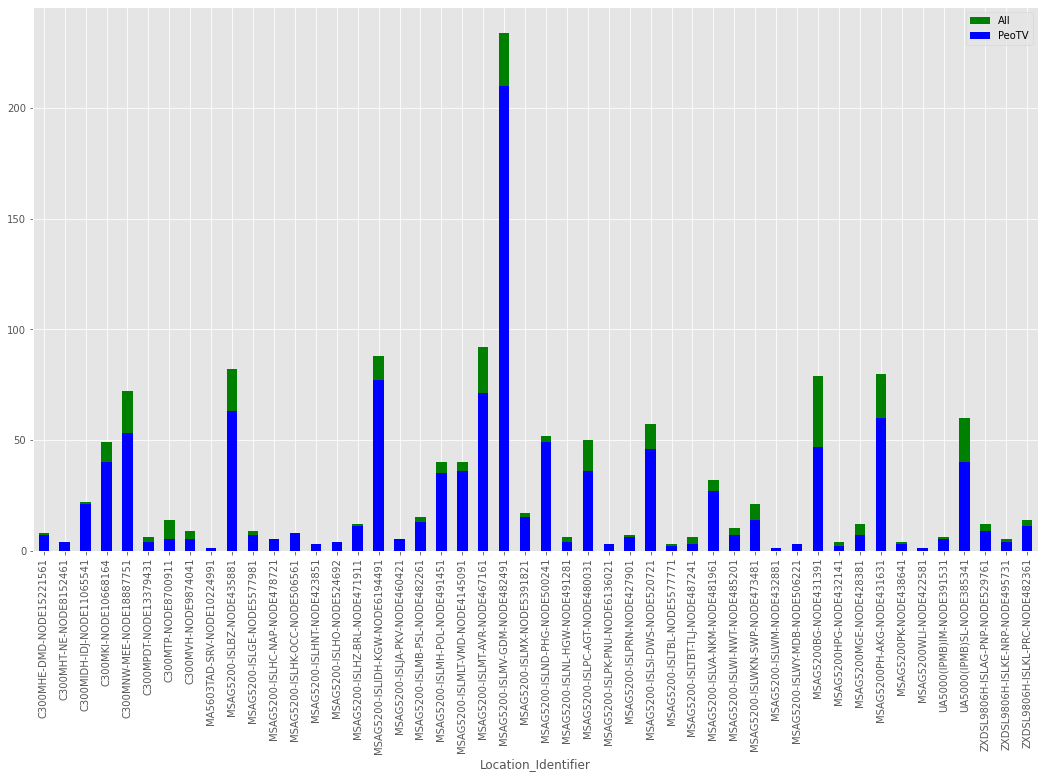

In [122]:
ax = cluster_1_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_1_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [123]:
loc_precentage=(cluster_1_peo_loc/cluster_1_loc)*100

In [124]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHE-DMD-NODE15221561            87.500000
C300MHT-NE-NODE8152461             100.000000
C300MIDH-IDJ-NODE11065541           95.454545
C300MKI-NODE10668164                81.632653
C300MNW-MEE-NODE18887751            73.611111
C300MPDT-NODE13379431               66.666667
MA5603TAD-SRV-NODE10224991         100.000000
MSAG5200-ISLBZ-NODE435881           76.829268
MSAG5200-ISLGE-NODE5577981          77.777778
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561      100.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLHZ-BRL-NODE471911       91.666667
MSAG5200-ISLIDH-KGW-NODE6194491     87.500000
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMB-PSL-NODE482261       86.666667
MSAG5200-ISLMH-POL-NODE491451       87.500000
MSAG5200-ISLMLT-VMD-NODE4145091     90.000000
MSAG5200-ISLMT-AVR-NODE467161       77.173913
MSAG5200-ISLMV-GDM-NODE482491       89.743590
MSAG5200-ISLMX

#### Feasible locations to offer Broadband

In [125]:
cluster_1_bb_loc = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY") | (cluster_1["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

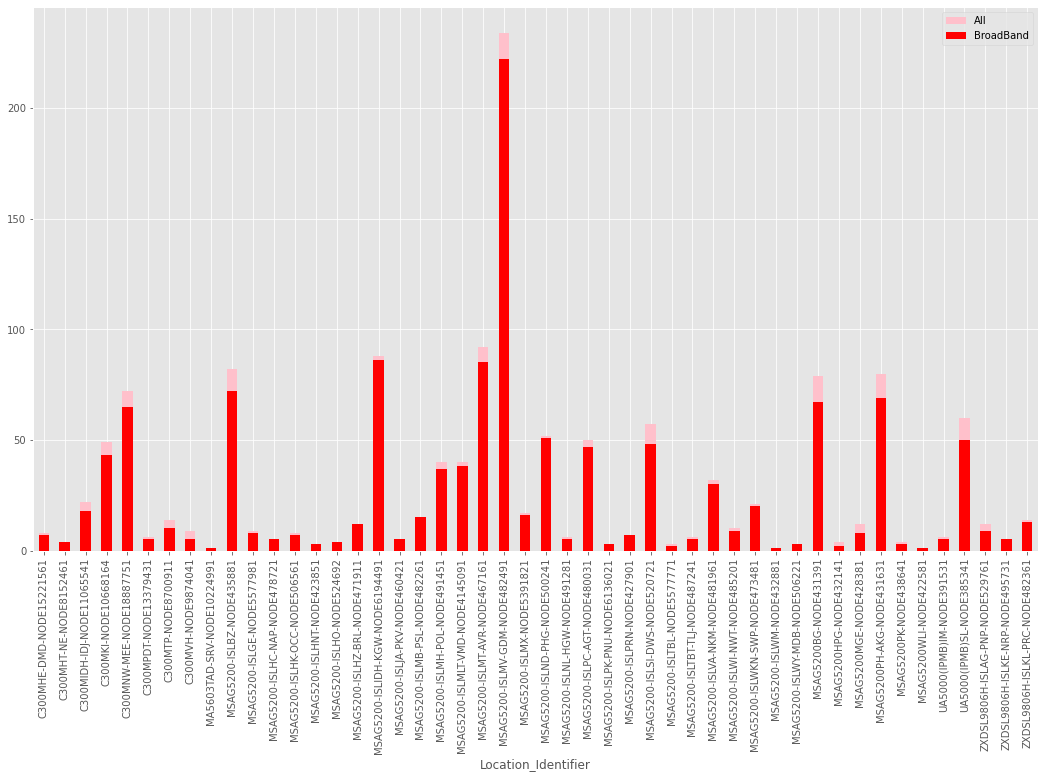

In [126]:
ax = cluster_1_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [127]:
loc_precentage=(cluster_1_bb_loc/cluster_1_loc)*100

In [128]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHE-DMD-NODE15221561            87.500000
C300MHT-NE-NODE8152461             100.000000
C300MIDH-IDJ-NODE11065541           81.818182
C300MKI-NODE10668164                87.755102
C300MNW-MEE-NODE18887751            90.277778
C300MPDT-NODE13379431               83.333333
C300MTP-NODE8700911                 71.428571
MA5603TAD-SRV-NODE10224991         100.000000
MSAG5200-ISLBZ-NODE435881           87.804878
MSAG5200-ISLGE-NODE5577981          88.888889
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561       87.500000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     97.727273
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451       92.500000
MSAG5200-ISLMLT-VMD-NODE4145091     95.000000
MSAG5200-ISLMT-AVR-NODE467161       92.391304
MSAG5200-ISLMV

## Cluster 1- Findings